## Report to Special Topics : Computational Physics
### Part B : Complex Field Transvere Model 
* Author : Yen-Tung Lin
* ID : 109022802

### Reference
* G von Gehlen 1991 J. Phys. A: Math. Gen. 24 5371

### Model
* <font size=4 face="黑體">$H$ = -$\frac{1}{2}\sum_{i} \sigma^{z}_{i} + \lambda\sigma^{x}_{i} \sigma^{x}_{i+1} + ih_{x}\sigma^{x}_{i}$
### To Calculate

###############################################

*  Check the following quantity first. Without complex filed, the critical point should be at hz = 1.
* * $\frac{E_{0}}{N}$ (Groung State Energy / N) 
* * $E_{1}-E_{0}$ ( Gap )
* * $\xi/N$ ( Correlation Length / N )
* * $\frac{\partial^{2}{E_0}}{\partial{h^{2}_{z}}}$
* * $<S_{x}>_{H=H_{0}+0.01*S_{x}}$ ( To see SSB )
* * $<S_{x}>$
* * $S_{A/B}$ vs $ln(N)$( Compare Bipartite Entropy Growth near vritical point  )
* * $S_{A}$ vs $N_{A}$ ( Entropy of Subsystem $S_{A}$ )

###############################################

*  With the complex field, the following quantity is to calculate to study the critical phenomena.
* * $Re(E_{1}), Re(E_{0})$ 
* * $Im(E_{1}), Im(E_{0})$
* * $Re(E_{1}-E_{0})$
* * $Im(E_{1}-E_{0})$
* * $\xi$=$Im(E_{1}-E_{0})$

## Import Parameter

### Classes Import

In [1]:
import os
import math
import pandas as pd
import random
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.optimize import curve_fit

### Ploting Import

In [2]:
## Basic parameter
cnames = {                        
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chocolate':            '#D2691E',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'orangered':            '#FF4500',
'orchid':               '#DA70D6'}
carr = []
for cmap in cnames.keys():                          ## color array
    carr.append(cmap)
marr = ['o-', 'x-', '^-', 's-', 'p-', '*-', 'h-']   ## marker array

## Pauli matrix ( normal and sparse )

In [3]:
hbar = 1

## Normal Pauli Matrix

SigmaX = np.array([[0,1],[1,0]])
SigmaY = np.array([[0,-1j],[1j,0]])
SigmaZ = np.array([[1,0],[0,-1]])

## Sparse Pauli Matrix

sparseSigmaX = sparse.csr_matrix([[0,1],[1,0]]).astype(float)
sparseSigmaY = sparse.csr_matrix([[0,-1j],[1j,0]]).astype(float)
sparseSigmaZ = sparse.csr_matrix([[1,0],[0,-1]]).astype(float)

## Normal Spin Operator

Sx = hbar/2*SigmaX
Sy = hbar/2*SigmaY
Sz = hbar/2*SigmaZ

## Sparse Spin Operator

sparseSx = hbar/2*sparseSigmaX
sparseSy = hbar/2*sparseSigmaY
sparseSz = hbar/2*sparseSigmaZ

## Normal Identity Operator

I = np.array([[1,0],[0,1]])

## Sparse Identity Operator

sparseI = sparse.csr_matrix(I).astype(float)



/home/aronton/anaconda3/lib/python3.8/site-packages/scipy/sparse/data.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  self._deduped_data().astype(dtype, casting=casting, copy=copy),


## Hamiltonian Function

#### $H$ = -$\frac{1}{2}\sum_{i} \sigma^{z}_{i} + \lambda\sigma^{x}_{i} \sigma^{x}_{i+1} + ih_{x}\sigma^{x}_{i}$

In [4]:
def sparseHamiltonain(L,sparseSx,sparseSy,sparseSz,sparseI,j,hx,hz):

    SigmaXtot = sparse.csr_matrix((2**L, 2**L)).astype(float)
    SigmaYtot = sparse.csr_matrix((2**L, 2**L)).astype(float)
    SigmaZtot = sparse.csr_matrix((2**L, 2**L)).astype(float)
    Htot = sparse.csr_matrix((2**L, 2**L)).astype(float)
    SigmaXList = []
    SigmaYList = []
    SigmaZList = []

    for k in range(L):
        x = sparseSx
        y = sparseSy
        z = sparseSz
        if(k == 0):
            for i in range(L-1):
                x = sparse.kron(x,sparseI,format = 'csr')
                y = sparse.kron(y,sparseI,format = 'csr')
                z = sparse.kron(z,sparseI,format = 'csr')
            SigmaXList.append(x)
            SigmaYList.append(y)
            SigmaZList.append(z)
        elif(k == L-1):
            for i in range(L-1):
                x = sparse.kron(sparseI,x,format = 'csr')
                y = sparse.kron(sparseI,y,format = 'csr')
                z = sparse.kron(sparseI,z,format = 'csr')
            SigmaXList.append(x)
            SigmaYList.append(y)
            SigmaZList.append(z)
        else:
            for i in range(k):
                x = sparse.kron(sparseI,x,format = 'csr')
                y = sparse.kron(sparseI,y,format = 'csr')
                z = sparse.kron(sparseI,z,format = 'csr')
            for i in range(k, L-1):
                x = sparse.kron(x,sparseI,format = 'csr')
                y = sparse.kron(y,sparseI,format = 'csr')
                z = sparse.kron(z,sparseI,format = 'csr')
            SigmaXList.append(x)
            SigmaYList.append(y)
            SigmaZList.append(z)

    if(hx == 0):
        for i in range(L):
            if i < L-1:
                Htot = Htot - j*SigmaXList[i] @ SigmaXList[i+1] - hz*SigmaZList[i] 
            else:
                Htot = Htot - j*SigmaXList[i] @ SigmaXList[0] - hz*SigmaZList[i] 
    else:
        for i in range(L):
            if i < L-1:
                Htot = Htot - j*SigmaXList[i] @ SigmaXList[i+1] - hz*SigmaZList[i] - 1j*hx*SigmaXList[i]
            else:
                Htot = Htot - j*SigmaXList[i] @ SigmaXList[0] - hz*SigmaZList[i] - 1j*hx*SigmaXList[i]


    for i in range(L):
        SigmaXtot = SigmaXtot + SigmaXList[i]
        SigmaYtot = SigmaYtot + SigmaYList[i]
        SigmaZtot = SigmaZtot + SigmaZList[i]

    return 0.5*Htot, SigmaZtot, SigmaZList, SigmaXtot, SigmaXList
    
   

## Real Hamiltoian Using Sparse

### Calculation ( complete by 16 min 45 s )

In [5]:
Llist = np.linspace(4,14,(14-4)//2 + 1,dtype = int)
print(Llist)
hz = np.linspace(0,1.2,61)
E0 = np.zeros((len(Llist),len(hz)))
E1 = np.zeros((len(Llist),len(hz)))
# entropy = np.zeros((len(Llist),len(Llist)+1,len(hz)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hz)))
lamda = np.zeros((len(Llist),len(hz)))
SzE = np.zeros((len(Llist),len(hz)))
SxE = np.zeros((len(Llist),len(hz)))


# fig, ax = plt.subplots(figsize=(16,16))
for l in range(len(Llist)):
    L = Llist[l]
    print("L:",L)
    entropy.append(np.zeros((L+1,len(hz))))
    entropy_tensor.append(np.zeros((L+1,len(hz))))

    for hz_i in range(len(hz)):

        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSigmaX,sparseSigmaY,sparseSigmaZ,sparseI,1,0,hz[hz_i])
        ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
        ex, Svx = sparse.linalg.eigsh(SHtot + 0.01*Sxtot,which="SA")

        index = np.argsort(ee)
        ee = sorted(ee)

        E0[l,hz_i] = ee[0]
        E1[l,hz_i] = ee[1]
        gap[l,hz_i] = ee[1] - ee[0]
        lamda[l,hz_i] = 1/gap[l,hz_i]/L
        SzE[l,hz_i] = Sv[:,index[0]] @ Szlist[0] @ Sv[:,index[0]] 
        SxE[l,hz_i] = Svx[:,index[0]] @ Sxlist[0] @ Svx[:,index[0]] 

        Na = np.linspace(0,L,L+1,dtype = int)
        for na in range(len(Na)):
            rv = np.reshape(Sv[:,0], (2**Na[na],2**(L-Na[na])))
            s = np.linalg.svd(rv, full_matrices=False, compute_uv=False)

            # # 用來把基態 reshape 成 (2,2,2,2...)
            # tensorshape = []
            # for L_i in range(L):
            #     tensorshape.append(2)
            # # 紀錄要接的index
            # dotAxes = np.linspace(0,L-1,L,dtype=int)
            # dotAxes=dotAxes[na:L]
            # # print(dotAxes)
            # if((na == 0) | (na == L+1)):
            #     entropy_tensor[l][na,hz_i] = 0
            # else:
            #     # 接完之後要 reshape 回一隻腳
            #     Ashape = (2**(na),2**((na)))
            #     eigntensor = np.reshape(Sv[:,0],tensorshape)
            #     eigntensor1 = np.copy(eigntensor)
            #     Atensor = np.reshape(np.tensordot(eigntensor,eigntensor1,axes=(dotAxes,dotAxes)),Ashape)
            #     singVlue, singVec = la.eigh(Atensor)
            #     for svalue in singVlue:
            #         entropy_tensor[l][na,hz_i] = entropy_tensor[l][na,hz_i] - np.abs(svalue)*np.log(np.abs(svalue))

            for svalue in s:
                entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)


[ 4  6  8 10 12 14]
L: 4
L: 6
L: 8
L: 10


<ipython-input-5-0eafa9642456>:36: RuntimeWarning: divide by zero encountered in double_scalars
  lamda[l,hz_i] = 1/gap[l,hz_i]/L


L: 12
L: 14


### In this notation, the critical point will be at hz = 1. Let's check first !

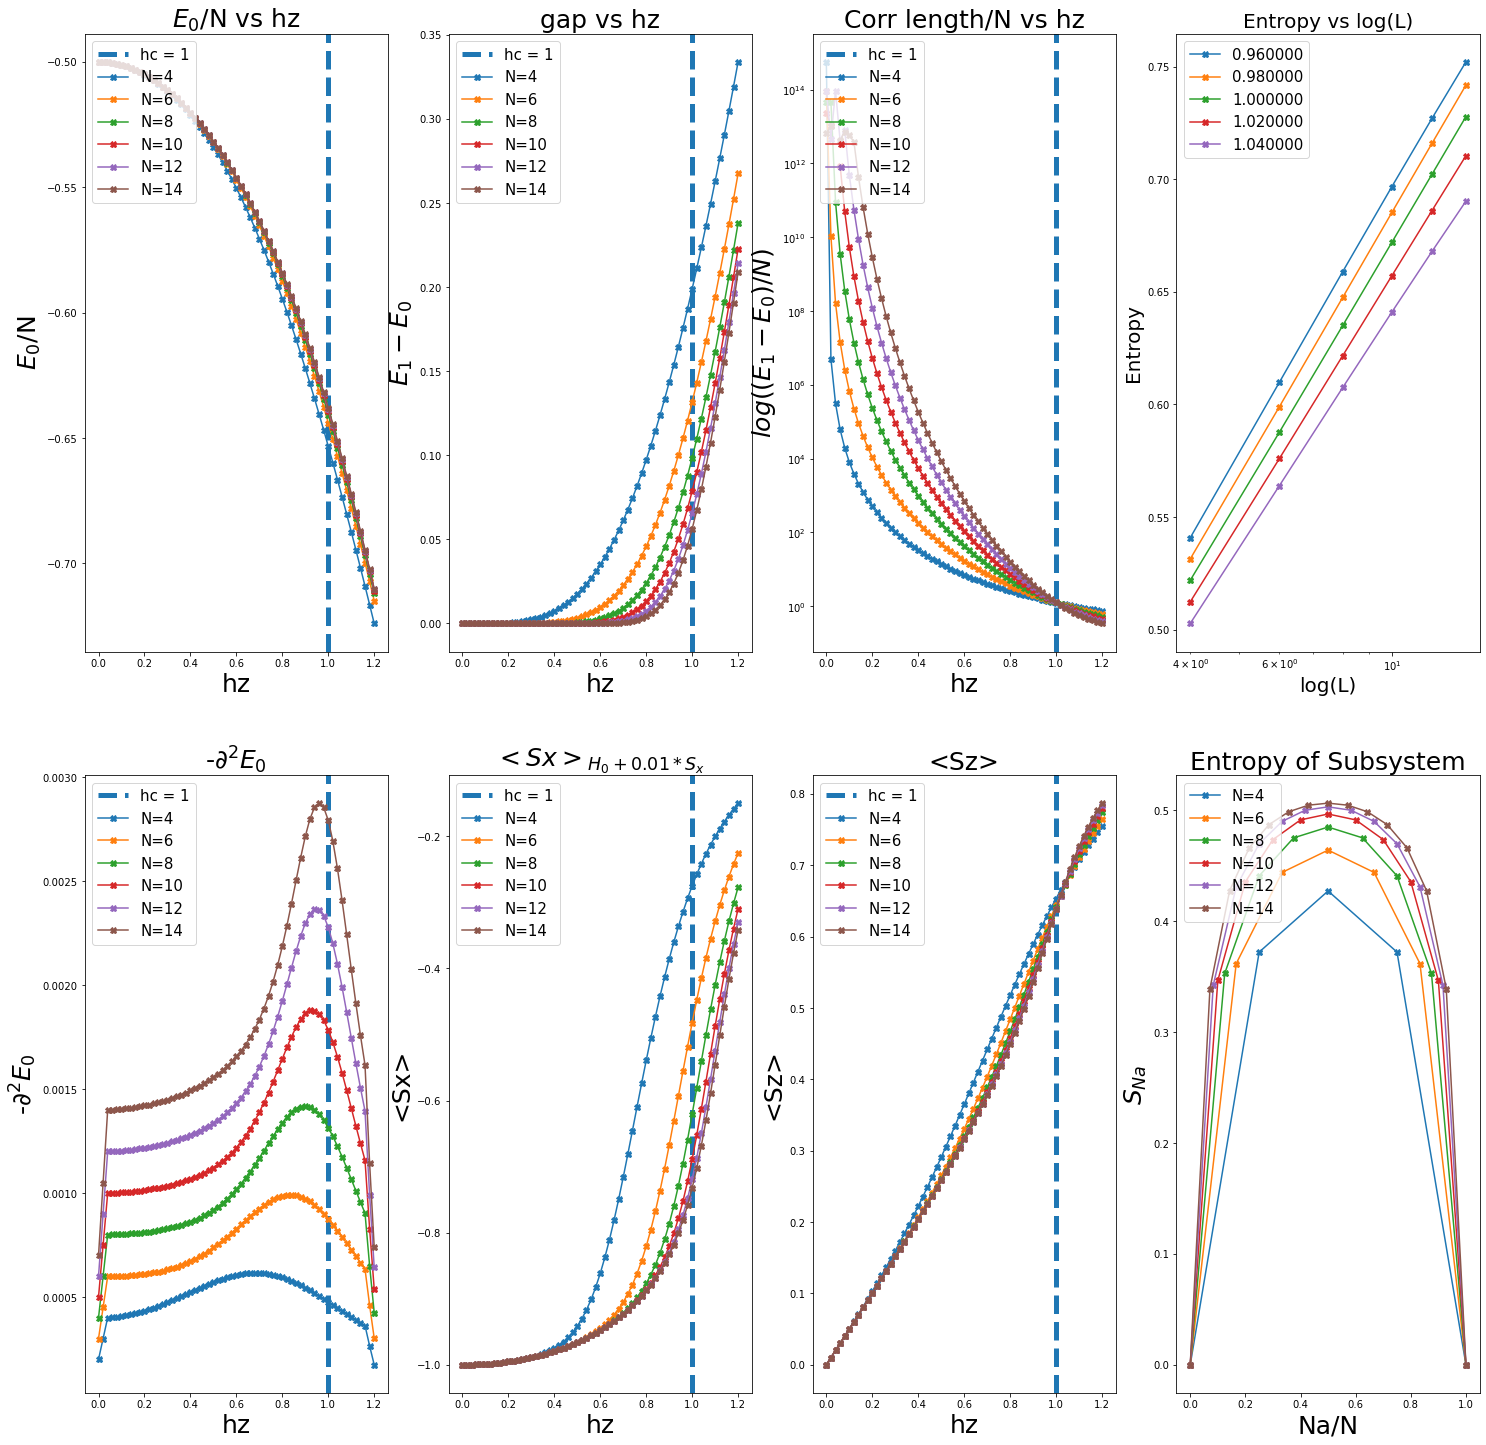

In [25]:
fig, ax = plt.subplots(2,4,figsize=(25,25))
entropyForAsize = np.zeros((len(Llist),len(hz)))
entropyForAsize1 = np.zeros((len(Llist),len(hz)))
for l in range(len(Llist)):
    L = Llist[l]
    if(l==0):
        ax[0][0].axvline(x=1, ymin=0, ymax=10, ls = "--", linewidth = 5 ,label = "hc = 1")
    ax[0][0].plot(hz[:],E0[l,:]/L, "-X", label = "N=%d" %L)
    ax[0][0].set_title("$E_0$/N vs hz", fontsize = 25)
    ax[0][0].set_ylabel("$E_0$/N", fontsize = 25)
    ax[0][0].set_xlabel("hz", fontsize = 25)
    ax[0][0].legend(loc = "upper left", fontsize=15)

    if(l==0):
        ax[0][1].axvline(x=1, ymin=0, ymax=10, ls = "--", linewidth = 5 ,label = "hc = 1")
    ax[0][1].plot(hz[:],gap[l,:], "-X", label = "N=%d" %L)
    ax[0][1].set_title("gap vs hz", fontsize = 25)
    ax[0][1].set_ylabel("$E_{1}-E_{0}$", fontsize = 25)
    ax[0][1].set_xlabel("hz", fontsize = 25)
    ax[0][1].legend(loc = "upper left", fontsize=15)

    if(l==0):
        ax[0][2].axvline(x=1, ymin=0, ymax=10, ls = "--", linewidth = 5 ,label = "hc = 1")
    ax[0][2].plot(hz[:],lamda[l,:], "-X", label = "N=%d" %L)
    ax[0][2].set_title("Corr length/N vs hz", fontsize = 25)
    ax[0][2].legend(loc = "upper left", fontsize=15)
    ax[0][2].set_ylabel("$log((E_1-E_0)/N)$", fontsize = 25)
    ax[0][2].set_xlabel("hz", fontsize = 25)
    ax[0][2].set_yscale('log')

    if(l==0):
        ax[1][0].axvline(x=1, ymin=0, ymax=10, ls = "--", linewidth = 5 ,label = "hc = 1")
    ax[1][0].plot(hz[:], -np.gradient(np.gradient(E0[l,:])), "-X", label = "N=%d" %L)
    ax[1][0].set_title("-$\partial^{2}E_0$", fontsize = 25)
    ax[1][0].set_ylabel("-$\partial^{2}E_0$", fontsize = 25)
    ax[1][0].set_xlabel("hz", fontsize = 25)
    ax[1][0].legend(loc = "upper left", fontsize=15)

    if(l==0):
        ax[1][1].axvline(x=1, ymin=0, ymax=10, ls = "--", linewidth = 5 ,label = "hc = 1")
    ax[1][1].plot(hz[:], SxE[l,:], "-X", label = "N=%d" %L)
    ax[1][1].set_title("$<Sx>_{H_{0}+0.01*S_{x}}$", fontsize = 25)
    ax[1][1].set_ylabel("<Sx>", fontsize = 25)
    ax[1][1].set_xlabel("hz", fontsize = 25)
    ax[1][1].legend(loc = "upper left", fontsize=15)

    if(l==0):
        ax[1][2].axvline(x=1, ymin=0, ymax=10, ls = "--", linewidth = 5 ,label = "hc = 1")
    ax[1][2].plot(hz[:], SzE[l,:], "-X", label = "N=%d" %L)
    ax[1][2].set_title("<Sz>", fontsize = 25)
    ax[1][2].set_ylabel("<Sz>", fontsize = 25)
    ax[1][2].set_xlabel("hz", fontsize = 25)
    ax[1][2].legend(loc = "upper left", fontsize=15)

    for h in range(len(hz)):
        entropyForAsize[l,h] = entropy[l][Llist[l]//2,h]
    # for h in range(len(hz)):
    #     entropyForAsize1[l,h] = entropy1[l][Llist[l]//2,h]


for hz_i in range(len(hz[0:len(hz)])):
    if((hz_i >= (len(hz)-13)) & (hz_i <= (len(hz)-9))):
        ax[0][3].plot(Llist[:],entropyForAsize[:,hz_i], "-X", label = "%f" %(hz[hz_i]))
        ax[0][3].set_ylabel("Entropy", fontsize = 20)
        ax[0][3].set_xlabel("log(L)", fontsize = 20)
        ax[0][3].set_title("Entropy vs log(L)", fontsize = 20)
        ax[0][3].legend(loc = "upper left", fontsize=15)
        ax[0][3].set_xscale('log')
    
# for l in range(len(Llist)):
#     Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
#     ax[1][3].plot(Na[:],entropy[l][:,(len(hz)+1)//2], "-X", label = "%d" %(Llist[l]))
#     ax[1][3].set_ylabel("Entropy", fontsize = 20)
#     ax[1][3].set_xlabel("Na", fontsize = 20)
#     ax[1][3].set_title("Entropy vs Na", fontsize = 20)
#     ax[1][3].legend(loc = "upper left", fontsize=15)

# for l in range(len(Llist)):
#     Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
#     SNa = []
#     for i in range(len(Na)):
#         SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
#     ax[1][3].plot(SNa[:],entropy[l][:,hz_i], "-X", label = "%d" %(Llist[l]))
#     ax[1][3].set_ylabel("Entropy", fontsize = 20)
#     ax[1][3].set_xlabel("Na", fontsize = 20)
#     ax[1][3].set_title("Entropy vs Na", fontsize = 20)
#     ax[1][3].legend(loc = "upper left", fontsize=15)
for l in range(len(Llist)):
    Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
    SNa = []
    for i in range(len(Na)):
        SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
    ax[1][3].plot(SNa[:],entropy[l][:,hz_i], "-X", label = "N=%d" %(Llist[l]))
    ax[1][3].set_ylabel("$S_{Na}$", fontsize = 25)
    ax[1][3].set_xlabel("Na/N", fontsize = 25)
    ax[1][3].set_title("Entropy of Subsystem", fontsize = 25)
    ax[1][3].legend(loc = "upper left", fontsize=15)

plt.show()

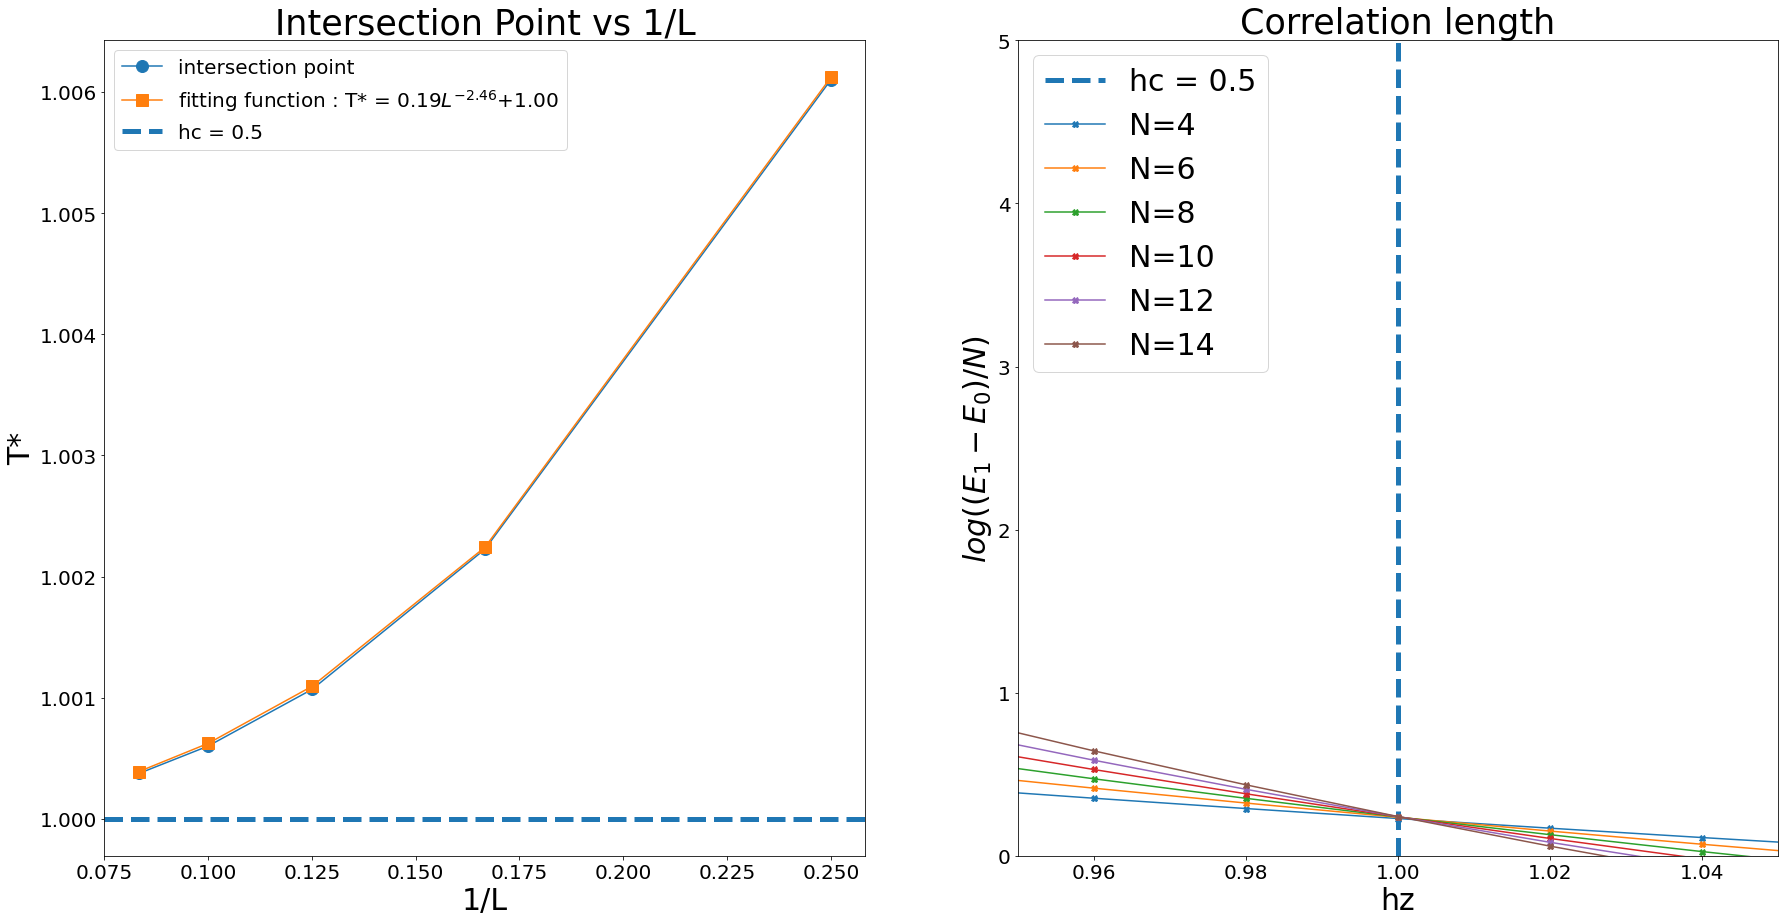

<Figure size 864x864 with 0 Axes>

In [33]:
Linverse = [(1/i) for i in range (4,14,2)]
hzlist = [i for i in range (40,60)]

hc = np.zeros(len(Llist)-1)
# print(hzlist)

fig, ax = plt.subplots(1,2,figsize=(30,15))


plt.figure(figsize=(12,12))
for i in range(len(Llist)-1):
    for hz_i in hzlist:
        if((lamda[i+1,hz_i] - lamda[i,hz_i])*(lamda[i+1,hz_i+1] - lamda[i,hz_i+1]) < 0):
            p1 = np.polyfit([hz[hz_i],hz[hz_i+1]],[lamda[i,hz_i],lamda[i,hz_i+1]],1)
            p2 = np.polyfit([hz[hz_i],hz[hz_i+1]],[lamda[i+1,hz_i],lamda[i+1,hz_i+1]],1)
            hc[i] = np.roots(p1 -p2)

def func(x, a, b, c):
    return a * x ** b + c

popt, pcov = curve_fit(func, Linverse, hc, maxfev=40000)
y = func(Linverse,*popt) +0.00002


ax[0].plot(Linverse[:],hc[:],"-o", markersize = 12, label = "intersection point")
ax[0].plot(Linverse[:],y[:],"-s", markersize = 12, label = "fitting function : T* = %.2f$L^{-%.2f}$+%.2f" %(popt[0],popt[1],popt[2]))
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_title("Intersection Point vs 1/L",fontsize = 35)
ax[0].axhline(y=1, ls = "--", linewidth = 5 ,label = "hc = 0.5")
ax[0].set_xlabel("1/L",fontsize = 30)
ax[0].set_ylabel("T*",fontsize = 30)
ax[0].legend(loc = "best", fontsize = 20)

for l in range(len(Llist)):
    L = Llist[l]
    if(l==0):
        ax[1].axvline(x=1, ymin=0, ymax=1, ls = "--", linewidth = 5 ,label = "hc = 0.5")
    ax[1].plot(hz[:],np.log(lamda[l,:]), "-X", label = "N=%d" %L)
    ax[1].tick_params(axis='x', labelsize=20)
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].set_title("Correlation length", fontsize = 35)
    ax[1].legend(loc = "upper left", fontsize=30)
    ax[1].set_ylabel("$log((E_1-E_0)/N)$", fontsize = 30)
    ax[1].set_xlabel("hz", fontsize = 30)
    ax[1].set_ylim(0,5)
    ax[1].set_xlim(0.95,1.05)


### Check : Tensor Method Comparison ( SVD vs density matrix )

In [34]:
Llist = np.linspace(4,10,(10-4)//2 + 1,dtype = int)
print(Llist)
hz = np.linspace(0,1,51)
E0 = np.zeros((len(Llist),len(hz)))
E1 = np.zeros((len(Llist),len(hz)))
# entropy = np.zeros((len(Llist),len(Llist)+1,len(hz)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hz)))
lamda = np.zeros((len(Llist),len(hz)))
SzE = np.zeros((len(Llist),len(hz)))
SxE = np.zeros((len(Llist),len(hz)))


# fig, ax = plt.subplots(figsize=(16,16))
for l in range(len(Llist)):
    L = Llist[l]
    print("L:",L)
    entropy.append(np.zeros((L+1,len(hz))))
    entropy_tensor.append(np.zeros((L+1,len(hz))))
    for hz_i in range(len(hz)):

        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSx,sparseSy,sparseSz,sparseI,1,0,hz[hz_i])
        ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
        ex, Svx = sparse.linalg.eigsh(SHtot + 0.01*Sxtot,which="SA")

        index = np.argsort(ee)
        ee = sorted(ee)

        Na = np.linspace(0,L,L+1,dtype = int)
        for na in range(len(Na)):
            rv = np.reshape(Sv[:,0], (2**Na[na],2**(L-Na[na])))
            s = np.linalg.svd(rv, full_matrices=False, compute_uv=False)

            # 用來把基態 reshape 成 (2,2,2,2...)
            tensorshape = []
            for L_i in range(L):
                tensorshape.append(2)
            # 紀錄要接的index
            dotAxes = np.linspace(0,L-1,L,dtype=int)
            dotAxes=dotAxes[na:L]
            # print(dotAxes)
            if((na == 0) | (na == L+1)):
                entropy_tensor[l][na,hz_i] = 0
            else:
                # 接完之後要 reshape 回一隻腳
                Ashape = (2**(na),2**((na)))
                eigntensor = np.reshape(Sv[:,0],tensorshape)
                eigntensor1 = np.copy(eigntensor)
                Atensor = np.reshape(np.tensordot(eigntensor,eigntensor1,axes=(dotAxes,dotAxes)),Ashape)
                singVlue, singVec = la.eigh(Atensor)
                for svalue in singVlue:
                    entropy_tensor[l][na,hz_i] = entropy_tensor[l][na,hz_i] - np.abs(svalue)*np.log(np.abs(svalue))

            for svalue in s:
                entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)

[ 4  6  8 10]
L: 4
L: 6
L: 8
L: 10


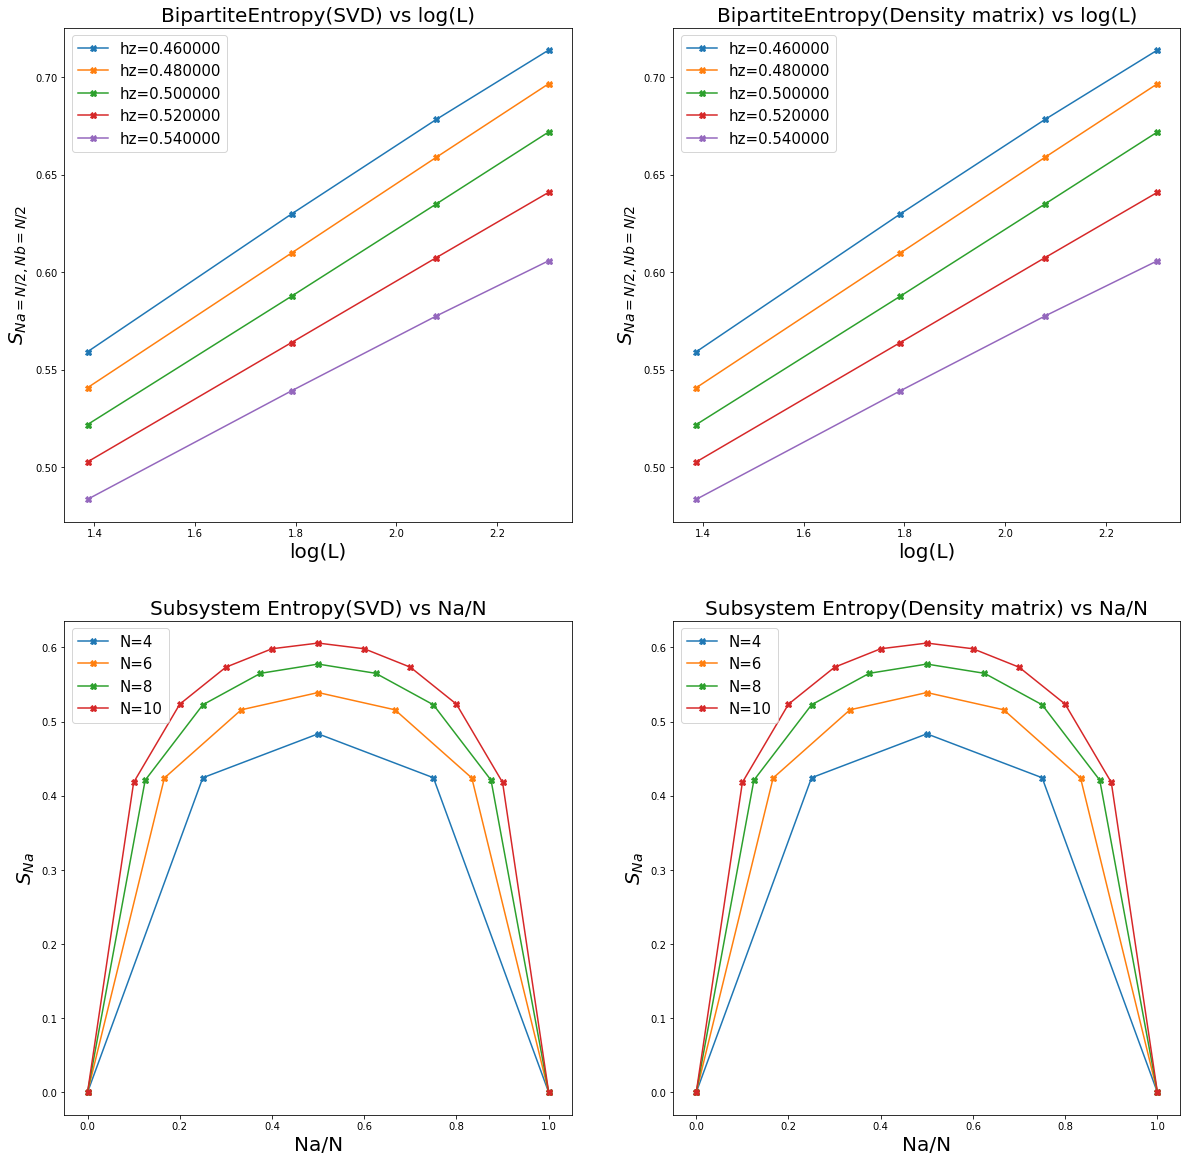

In [20]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
entropyForAsize = np.zeros((len(Llist),len(hz)))
entropyForAsize_tensor = np.zeros((len(Llist),len(hz)))
for l in range(len(Llist)):
    L = Llist[l]
    for h in range(len(hz)):
        entropyForAsize[l,h] = entropy[l][Llist[l]//2,h]
    for h in range(len(hz)):
        entropyForAsize_tensor[l,h] = entropy_tensor[l][Llist[l]//2,h]

for hz_i in range(len(hz[0:(len(hz)+1)//2])+2):
    if(hz_i >= (len(hz)-1)//2 - 2):
        ax[0][0].plot(np.log(Llist),entropyForAsize[:,hz_i], "-X", label = "hz=%f" %(hz[hz_i]))
        ax[0][0].set_ylabel("$S_{Na=N/2,Nb=N/2}$", fontsize = 20)
        ax[0][0].set_xlabel("log(L)", fontsize = 20)
        ax[0][0].set_title("BipartiteEntropy(SVD) vs log(L)", fontsize = 20)
        ax[0][0].legend(loc = "upper left", fontsize=15)
        # ax[0][0].set_xscale('log')

for hz_i in range(len(hz[0:(len(hz)+1)//2+2])):
    if(hz_i >= (len(hz)-1)//2 - 2):
        ax[0][1].plot(np.log(Llist),entropyForAsize_tensor[:,hz_i], "-X", label = "hz=%f" %(hz[hz_i]))
        ax[0][1].set_ylabel("$S_{Na=N/2,Nb=N/2}$", fontsize = 20)
        ax[0][1].set_xlabel("log(L)", fontsize = 20)
        ax[0][1].set_title("BipartiteEntropy(Density matrix) vs log(L)", fontsize = 20)
        ax[0][1].legend(loc = "upper left", fontsize=15)
        # ax[0][1].set_xscale('log')

for l in range(len(Llist)):
    Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
    SNa = []
    for i in range(len(Na)):
        SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
    ax[1][0].plot(SNa[:],entropy[l][:,hz_i], "-X", label = "N=%d" %(Llist[l]))
    ax[1][0].set_ylabel("$S_{Na}$", fontsize = 20)
    ax[1][0].set_xlabel("Na/N", fontsize = 20)
    ax[1][0].set_title("Subsystem Entropy(SVD) vs Na/N", fontsize = 20)
    ax[1][0].legend(loc = "upper left", fontsize=15)

for l in range(len(Llist)):
    Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
    SNa = []
    for i in range(len(Na)):
        SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
    ax[1][1].plot(SNa[:],entropy_tensor[l][:,hz_i], "-X", label = "N=%d" %(Llist[l]))
    ax[1][1].set_ylabel("$S_{Na}$", fontsize = 20)
    ax[1][1].set_xlabel("Na/N", fontsize = 20)
    ax[1][1].set_title("Subsystem Entropy(Density matrix) vs Na/N", fontsize = 20)
    ax[1][1].legend(loc = "upper left", fontsize=15)

In [232]:
Llist = np.linspace(4,12,(12-4)//2 + 1,dtype = int)
print(Llist)
hz = np.linspace(0,0.3,31)
E0 = np.zeros((len(Llist),len(hz)))
E1 = np.zeros((len(Llist),len(hz)))
# entropy = np.zeros((len(Llist),len(Llist)+1,len(hz)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hz)))
lamda = np.zeros((len(Llist),len(hz)))
SzE = np.zeros((len(Llist),len(hz)))
SxE = np.zeros((len(Llist),len(hz)))


# fig, ax = plt.subplots(figsize=(16,16))
for l in range(len(Llist)):
    L = Llist[l]
    print("L:",L)
    entropy.append(np.zeros((L+1,len(hz))))
    entropy_tensor.append(np.zeros((L+1,len(hz))))
    for hz_i in range(len(hz)):

        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSigmaX,sparseSigmaY,sparseSigmaY,sparseI,1,0,hz[hz_i])
        ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
        ex, Svx = sparse.linalg.eigsh(SHtot + 0.01*Sxtot,which="SA")

        index = np.argsort(ee)
        ee = sorted(ee)

        Na = np.linspace(0,L,L+1,dtype = int)
        for na in range(len(Na)):
            rv = np.reshape(Sv[:,0], (2**Na[na],2**(L-Na[na])))
            s = np.linalg.svd(rv, full_matrices=False, compute_uv=False)

            # 用來把基態 reshape 成 (2,2,2,2...)
            tensorshape = []
            for L_i in range(L):
                tensorshape.append(2)
            # 紀錄要接的index
            dotAxes = np.linspace(0,L-1,L,dtype=int)
            dotAxes=dotAxes[na:L]
            # print(dotAxes)
            if((na == 0) | (na == L+1)):
                entropy_tensor[l][na,hz_i] = 0
            else:
                # 接完之後要 reshape 回一隻腳
                Ashape = (2**(na),2**((na)))
                eigntensor = np.reshape(Sv[:,0],tensorshape)
                eigntensor1 = np.copy(eigntensor)
                Atensor = np.reshape(np.tensordot(eigntensor,eigntensor1,axes=(dotAxes,dotAxes)),Ashape)
                singVlue, singVec = la.eigh(Atensor)
                for svalue in singVlue:
                    entropy_tensor[l][na,hz_i] = entropy_tensor[l][na,hz_i] - np.abs(svalue)*np.log(np.abs(svalue))

            for svalue in s:
                entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)

[ 4  6  8 10 12]
L: 4
L: 6
L: 8
L: 10
L: 12


KeyboardInterrupt: 

## Complex Hamiltonian using sparse

### To Calculation 

* $Re(E_{1}), Re(E_{0})$ ( To find the critical line )
* $Im(E_{1}), Im(E_{0})$ ( To find the critical line )
* $Re(E_{1}-E_{0})$
* $Im(E_{1}-E_{0})$

In [233]:
Llist = np.linspace(4,12,(12-4)+1,dtype = int)
print(Llist)
j_list = np.linspace(0.7,0.9,3)
hx = np.linspace(0,0.3,31)
E0 = np.zeros((len(Llist),len(hx),len(j_list)),dtype=complex)
E1 = np.zeros((len(Llist),len(hx),len(j_list)),dtype=complex)
imGap = np.zeros((len(Llist),len(hx),len(j_list)))
lamda = np.zeros((len(Llist),len(hx),len(j_list)))
Gap = np.zeros((len(Llist),len(hx),len(j_list)))


for j_i in range(len(j_list)):
    for l in range(len(Llist)):
        L = Llist[l]
        print("L:",L)
        for hx_i in range(len(hx)):
            SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSigmaX,sparseSigmaY,sparseSigmaZ,sparseI,j_list[j_i],hx[hx_i],1)
            ee, Sv = sparse.linalg.eigs(SHtot,which="SR")
            # ee = np.sort_complex(ee)
            E0[l,hx_i,j_i] = ee[0]
            E1[l,hx_i,j_i] = ee[1]
            Gap[l,hx_i,j_i] = np.real(ee[1] - ee[0])
            imGap[l,hx_i,j_i] = np.imag(ee[1] - ee[0])
            lamda[l,hx_i,j_i] = 1/np.abs(np.real(ee[1] - ee[0]))/L

np.save("./E0_complex_L=%d_%d(2)_hx=%d_J=%d" %(Llist[0],Llist[-1],len(hx),len(j_list)),E0)
np.save("./E1_complex_L=%d_%d(2)_hx=%d_J=%d" %(Llist[0],Llist[-1],len(hx),len(j_list)),E1)
np.save("./Gap_complex_L=%d_%d(2)_hx=%d_J=%d" %(Llist[0],Llist[-1],len(hx),len(j_list)),Gap)
np.save("./lamda_complex_L=%d_%d(2)_hx=%d_J=%d" %(Llist[0],Llist[-1],len(hx),len(j_list)),lamda)
np.save("./imGap_complex_L=%d_%d(2)_hx=%d_J=%d" %(Llist[0],Llist[-1],len(hx),len(j_list)),imGap)

[ 4  5  6  7  8  9 10 11 12]
L: 4


<ipython-input-233-84873d096e23>:24: RuntimeWarning: divide by zero encountered in double_scalars
  lamda[l,hx_i,j_i] = 1/np.abs(np.real(ee[1] - ee[0]))/L


L: 5
L: 6
L: 7
L: 8
L: 9
L: 10
L: 11
L: 12
L: 4
L: 5
L: 6
L: 7
L: 8
L: 9
L: 10
L: 11
L: 12
L: 4
L: 5
L: 6
L: 7
L: 8
L: 9
L: 10
L: 11
L: 12


### Data Plot

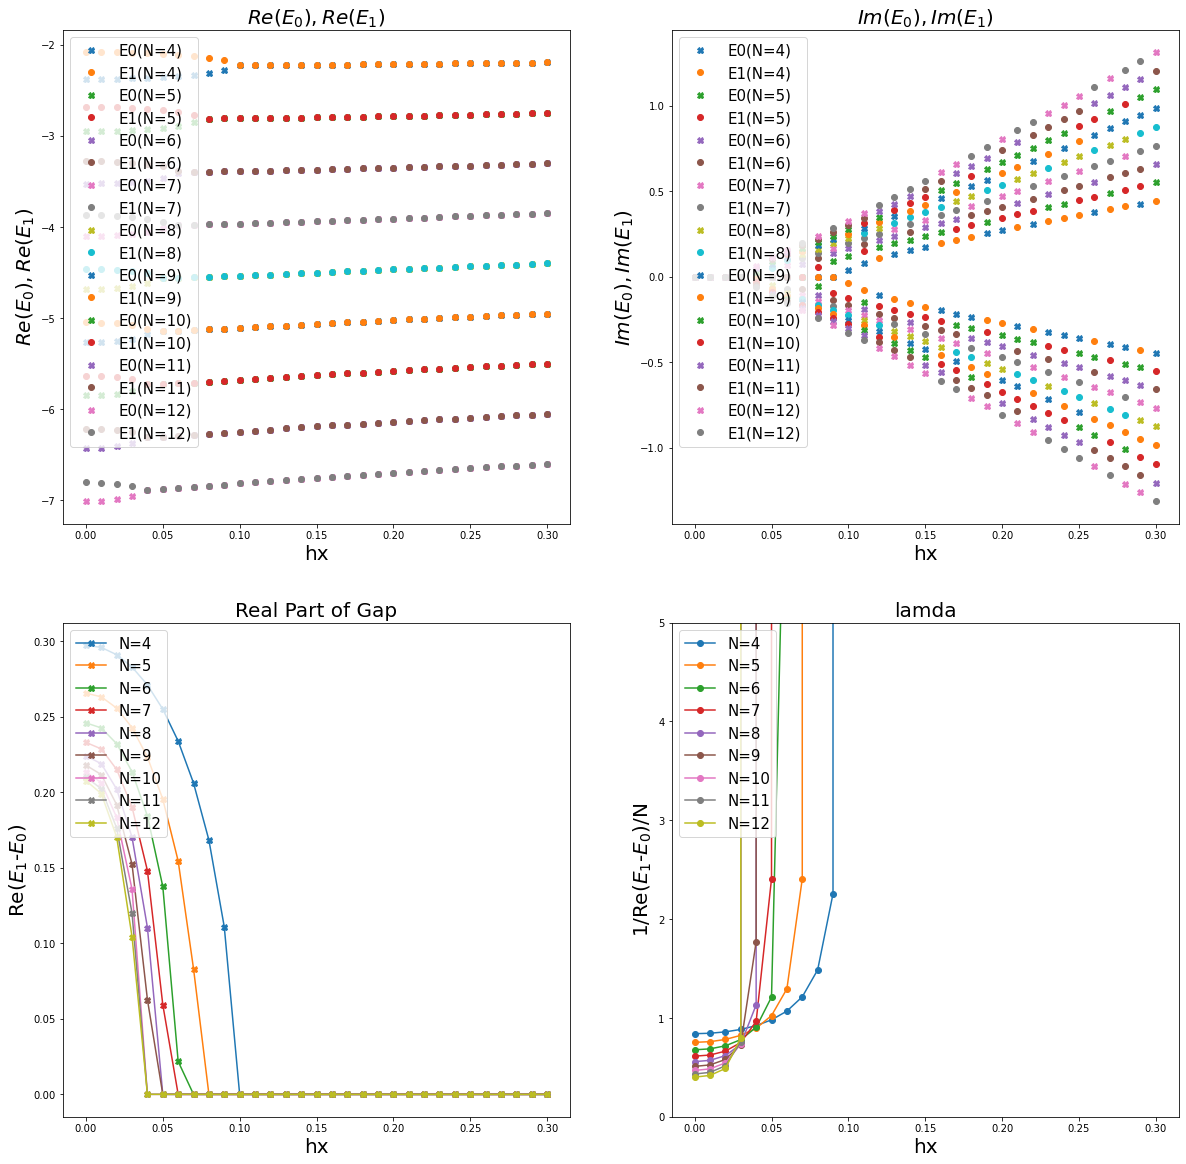

In [244]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
for l in range(len(Llist)):
    L = Llist[l]
    ax[0][0].plot(hx[:],np.real(E0[l,:,1]), "X", label = "E0(N=%d)" %L)
    ax[0][0].plot(hx[:],np.real(E1[l,:,1]), "o", label = "E1(N=%d)" %L)
    ax[0][0].set_title("$Re(E_{0}),Re(E_{1})$", fontsize = 20)
    ax[0][0].set_ylabel("$Re(E_{0}),Re(E_{1})$", fontsize = 20)
    ax[0][0].set_xlabel("hx", fontsize = 20)
    ax[0][0].legend(loc = "upper left", fontsize=15)

    ax[0][1].plot(hx[:],np.imag(E0[l,:,1]), "X", label = "E0(N=%d)" %L)
    ax[0][1].plot(hx[:],np.imag(E1[l,:,1]), "o", label = "E1(N=%d)" %L)
    ax[0][1].set_title("$Im(E_{0}),Im(E_{1})$", fontsize = 20)
    ax[0][1].set_ylabel("$Im(E_{0}),Im(E_{1})$", fontsize = 20)
    ax[0][1].set_xlabel("hx", fontsize = 20)
    ax[0][1].legend(loc = "upper left", fontsize=15)

    ax[1][0].plot(hx[:],Gap[l,:,1], "-X", label = "N=%d" %L)
    ax[1][0].set_title("Real Part of Gap", fontsize = 20)
    ax[1][0].set_ylabel("Re($E_1$-$E_0$)", fontsize = 20)
    ax[1][0].set_xlabel("hx", fontsize = 20)
    ax[1][0].legend(loc = "upper left", fontsize=15)

    ax[1][1].plot(hx[:],lamda[l,:,1], "-o", label = "N=%d" %L)
    ax[1][1].set_title("lamda", fontsize = 20)
    ax[1][1].set_ylabel("1/Re($E_1$-$E_0$)/N", fontsize = 20)
    ax[1][1].set_xlabel("hx", fontsize = 20)
    ax[1][1].legend(loc = "upper left", fontsize=15)
    ax[1][1].set_ylim(0,5)

plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


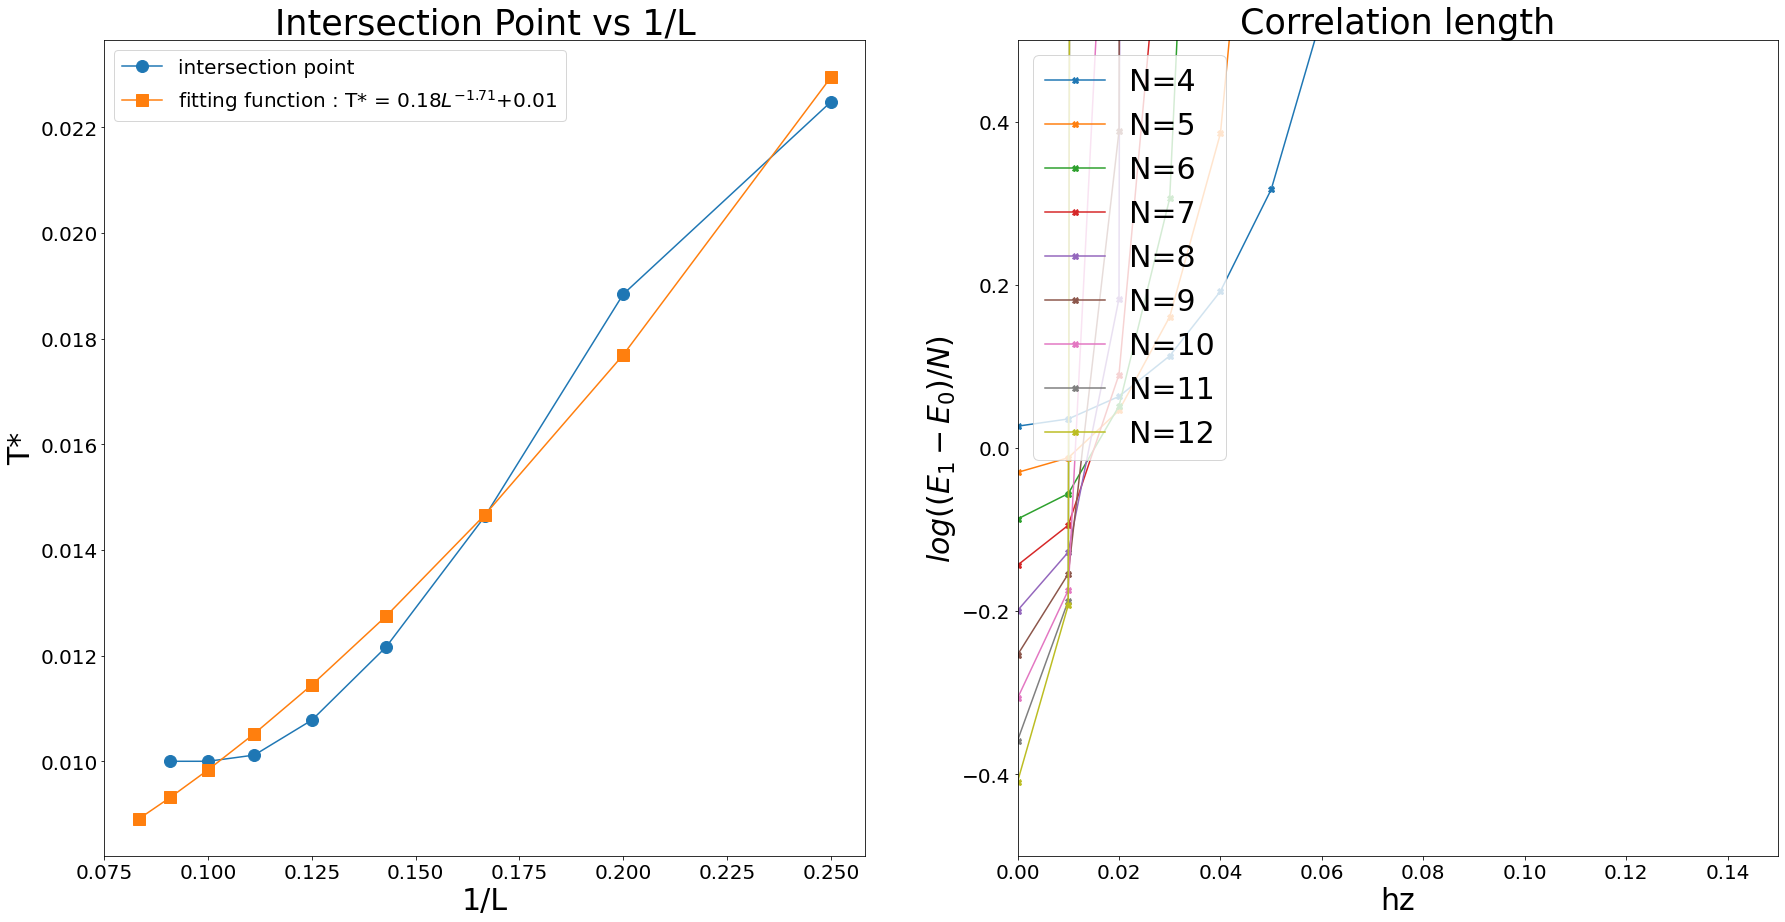

<Figure size 864x864 with 0 Axes>

In [245]:
Linverse = [(1/i) for i in range (4,13,1)]
hzlist = [i for i in range (0,30)]

hc = np.zeros(len(Linverse)-1)
print(hzlist)

fig, ax = plt.subplots(1,2,figsize=(30,15))


plt.figure(figsize=(12,12))
for i in range(len(Linverse)-1):
    for hz_i in hzlist:
        if((lamda[i+1,hz_i,2] - lamda[i,hz_i,2])*(lamda[i+1,hz_i+1,2] - lamda[i,hz_i+1,2]) < 0):
            # print("(lamda[i+1,hz_i] - lamda[i,hz_i])*(lamda[i+1,hz_i+1] - lamda[i,hz_i+1])",(lamda[i+1,hz_i,4] - lamda[i,hz_i,4])*(lamda[i+1,hz_i+1,4] - lamda[i,hz_i+1,4]))
            p1 = np.polyfit([hx[hz_i],hx[hz_i+1]],[lamda[i,hz_i,2],lamda[i,hz_i+1,2]],1)
            p2 = np.polyfit([hx[hz_i],hx[hz_i+1]],[lamda[i+1,hz_i,2],lamda[i+1,hz_i+1,2]],1)
            # print("p1:")
            # print("p2:",p2)
            hc[i] = np.roots(p1 -p2)
            break

def func(x, a, b, c):
    return a * x ** b + c

popt, pcov = curve_fit(func, Linverse[0:len(Linverse)-1], hc, maxfev=40000)
y = func(Linverse,*popt) +0.00002


ax[0].plot(Linverse[0:len(Linverse)-1],hc[:],"-o", markersize = 12, label = "intersection point")
ax[0].plot(Linverse[:],y[:],"-s", markersize = 12, label = "fitting function : T* = %.2f$L^{-%.2f}$+%.2f" %(popt[0],popt[1],popt[2]))
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_title("Intersection Point vs 1/L",fontsize = 35)
# ax[0].axhline(y=0.5, ls = "--", linewidth = 5 ,label = "hc = 0.5")
ax[0].set_xlabel("1/L",fontsize = 30)
ax[0].set_ylabel("T*",fontsize = 30)
ax[0].legend(loc = "best", fontsize = 20)

for l in range(len(Linverse)):
    L = Llist[l]
    # if(l==0):
    #     ax[1].axvline(x=.5, ymin=0, ymax=1, ls = "--", linewidth = 5 ,label = "hc = 0.5")
    ax[1].plot(hx[:],np.log(lamda[l,:,2]), "-X", label = "N=%d" %L)
    ax[1].tick_params(axis='x', labelsize=20)
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].set_title("Correlation length", fontsize = 35)
    ax[1].legend(loc = "upper left", fontsize=30)
    ax[1].set_ylabel("$log((E_1-E_0)/N)$", fontsize = 30)
    ax[1].set_xlabel("hz", fontsize = 30)
    ax[1].set_ylim(-0.5,0.5)
    ax[1].set_xlim(0,0.15)

In [186]:
Llist = np.linspace(4,12,(12-4)+1,dtype = int)
print(Llist)
j_list = np.linspace(0.1,0.9,5)
hx = np.linspace(0.2,0.5,31)
E0 = np.zeros((len(Llist),len(hx),len(j_list)),dtype=complex)
E1 = np.zeros((len(Llist),len(hx),len(j_list)),dtype=complex)
imGap = np.zeros((len(Llist),len(hx),len(j_list)))
lamda = np.zeros((len(Llist),len(hx),len(j_list)))
Gap = np.zeros((len(Llist),len(hx),len(j_list)))


for j_i in range(len(j_list)):
    for l in range(len(Llist)):
        L = Llist[l]
        for hx_i in range(len(hx)):
            SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSx,sparseSy,sparseSz,sparseI,j_list[j_i],hx[hx_i],1)
            ee, Sv = sparse.linalg.eigs(SHtot)
            ee = np.sort_complex(ee)
            E0[l,hx_i,j_i] = ee[0]
            E1[l,hx_i,j_i] = ee[1]
            Gap[l,hx_i,j_i] = np.real(ee[1] - ee[0])
            imGap[l,hx_i,j_i] = np.imag(ee[1] - ee[0])
            lamda[l,hx_i,j_i] = 1/np.real(ee[1] - ee[0])/L

[ 4  5  6  7  8  9 10 11 12]


KeyboardInterrupt: 

In [91]:
np.save("./E0_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse" %(Llist[0],Llist[-1],len(hx),len(j_list)),E0)
np.save("./E1_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse" %(Llist[0],Llist[-1],len(hx),len(j_list)),E1)
np.save("./Gap_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse" %(Llist[0],Llist[-1],len(hx),len(j_list)),Gap)
np.save("./imGap_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse" %(Llist[0],Llist[-1],len(hx),len(j_list)),imGap)
np.save("./lamda_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse" %(Llist[0],Llist[-1],len(hx),len(j_list)),lamda)
# np.save("./SzE_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse" %(Llist[0],Llist[-1],len(hz)),SzE)
# np.save("./SxE_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse" %(Llist[0],Llist[-1],len(hz)),SxE)

In [92]:
E00=np.load("./E0_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse.npy" %(Llist[0],Llist[-1],len(hx),len(j_list)))
E10=np.load("./E1_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse.npy" %(Llist[0],Llist[-1],len(hx),len(j_list)))
Gap0=np.load("./Gap_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse.npy" %(Llist[0],Llist[-1],len(hx),len(j_list)))
imGap0=np.load("./imGap_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse.npy" %(Llist[0],Llist[-1],len(hx),len(j_list)))
lamda0=np.load("./lamda_L1=%d_L2=%d_hxpoint=%d_Jpoint=%d_sparse.npy" %(Llist[0],Llist[-1],len(hx),len(j_list)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


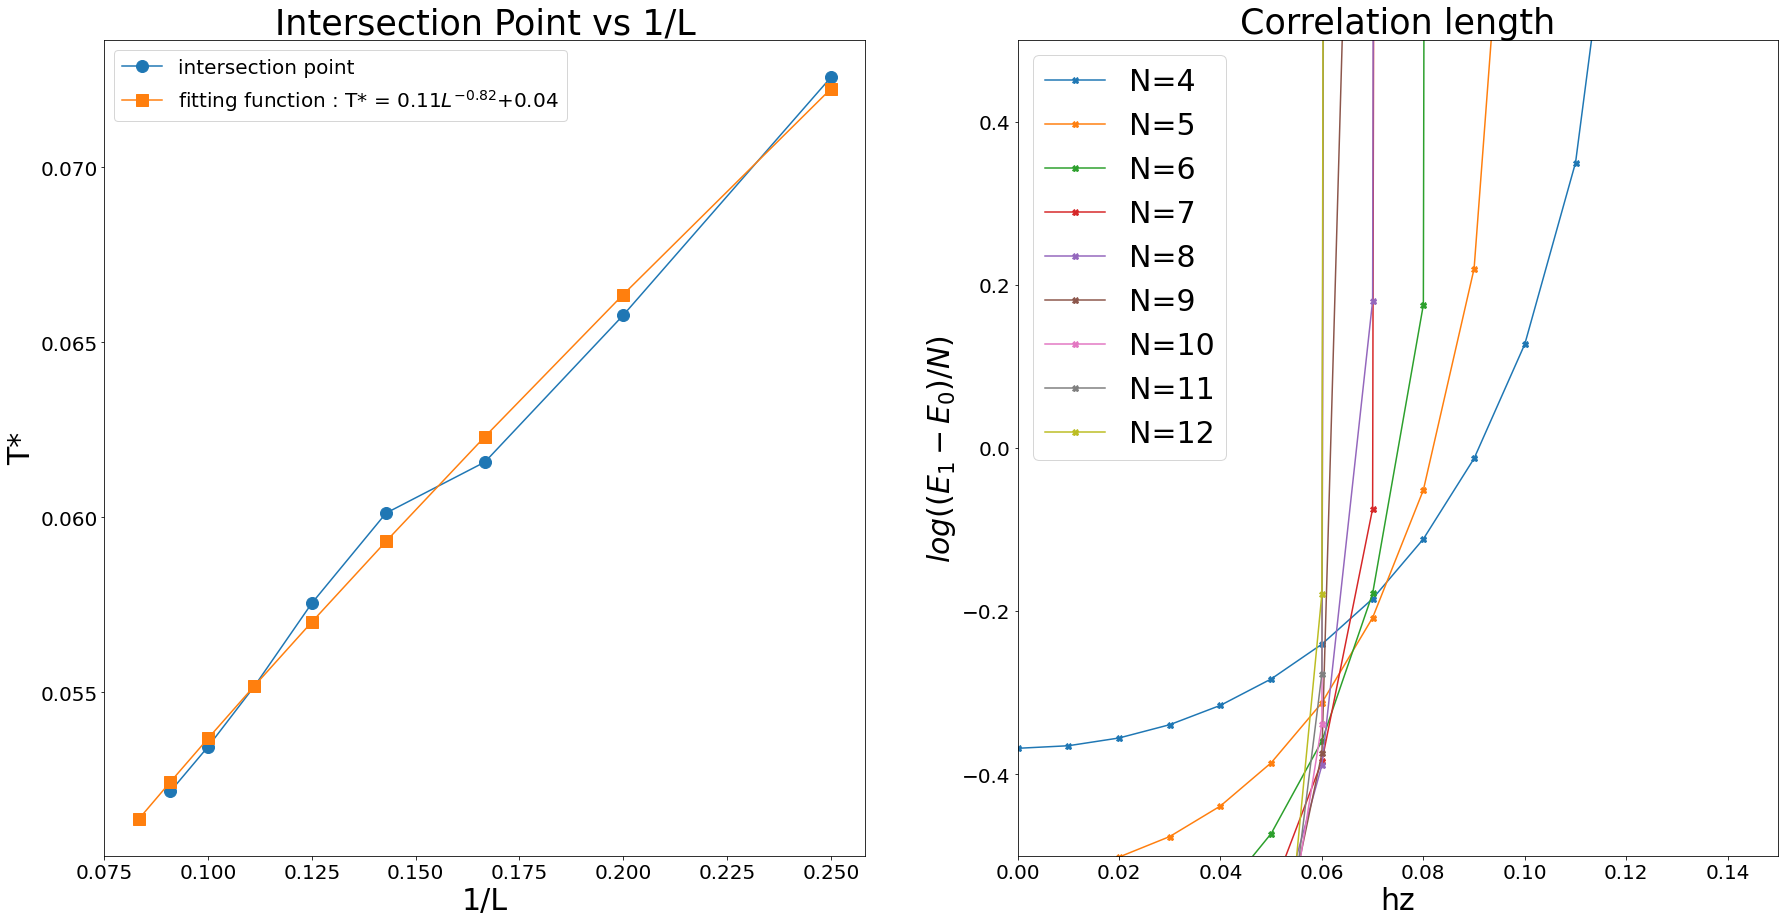

<Figure size 864x864 with 0 Axes>

In [242]:
Linverse = [(1/i) for i in range (4,13,1)]
hzlist = [i for i in range (0,30)]

hc = np.zeros(len(Linverse)-1)
print(hzlist)

fig, ax = plt.subplots(1,2,figsize=(30,15))


plt.figure(figsize=(12,12))
for i in range(len(Linverse)-1):
    for hz_i in hzlist:
        if((lamda[i+1,hz_i,0] - lamda[i,hz_i,0])*(lamda[i+1,hz_i+1,0] - lamda[i,hz_i+1,0]) < 0):
            # print("(lamda[i+1,hz_i] - lamda[i,hz_i])*(lamda[i+1,hz_i+1] - lamda[i,hz_i+1])",(lamda[i+1,hz_i,4] - lamda[i,hz_i,4])*(lamda[i+1,hz_i+1,4] - lamda[i,hz_i+1,4]))
            p1 = np.polyfit([hx[hz_i],hx[hz_i+1]],[lamda[i,hz_i,0],lamda[i,hz_i+1,0]],1)
            p2 = np.polyfit([hx[hz_i],hx[hz_i+1]],[lamda[i+1,hz_i,0],lamda[i+1,hz_i+1,0]],1)
            # print("p1:")
            # print("p2:",p2)
            hc[i] = np.roots(p1 -p2)
            break

def func(x, a, b, c):
    return a * x ** b + c

popt, pcov = curve_fit(func, Linverse[0:len(Linverse)-1], hc, maxfev=40000)
y = func(Linverse,*popt) +0.00002


ax[0].plot(Linverse[0:len(Linverse)-1],hc[:],"-o", markersize = 12, label = "intersection point")
ax[0].plot(Linverse[:],y[:],"-s", markersize = 12, label = "fitting function : T* = %.2f$L^{-%.2f}$+%.2f" %(popt[0],popt[1],popt[2]))
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].set_title("Intersection Point vs 1/L",fontsize = 35)
# ax[0].axhline(y=0.5, ls = "--", linewidth = 5 ,label = "hc = 0.5")
ax[0].set_xlabel("1/L",fontsize = 30)
ax[0].set_ylabel("T*",fontsize = 30)
ax[0].legend(loc = "best", fontsize = 20)

for l in range(len(Linverse)):
    L = Llist[l]
    # if(l==0):
    #     ax[1].axvline(x=.5, ymin=0, ymax=1, ls = "--", linewidth = 5 ,label = "hc = 0.5")
    ax[1].plot(hx[:],np.log(lamda[l,:,0]), "-X", label = "N=%d" %L)
    ax[1].tick_params(axis='x', labelsize=20)
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].set_title("Correlation length", fontsize = 35)
    ax[1].legend(loc = "upper left", fontsize=30)
    ax[1].set_ylabel("$log((E_1-E_0)/N)$", fontsize = 30)
    ax[1].set_xlabel("hz", fontsize = 30)
    ax[1].set_ylim(-0.5,0.5)
    ax[1].set_xlim(0,0.15)


In [69]:
Llist[4:8]

array([12, 14, 16])

## Seeking Phase ( 注意複數、要取 conjugate )

### Nearly Hermitian Hamiltionian

In [26]:
Htot, ztot, zlist, xtot, xlist = Hamiltonain(4, Sx, Sy, Sz, I, 1, 10**2, 0.5)
print(type(Htot[0,0]))
ee, v_R = la.eig(Htot)
Htot_dagger = Htot.conjugate().transpose()
ee, v_L = la.eig(Htot)
phase = v_R[:,0].conjugate() @ v_L[:,0]

L0 = np.copy(v_L[:,0]/phase)
R = np.copy(v_R[:,0])
L = np.copy(v_L[:,0])

print(L.conjugate() @ R)
print(L0.conjugate() @ R)

print(np.shape(R))
print(np.shape(L0))

rho_RL0 = np.tensordot(R,L0.conjugate(),0)
rho_RR = np.tensordot(R,R.conjugate(),0)

print(np.shape(rho_RL0))
print(np.shape(rho_RR))


print(np.trace(rho_RL0))
print(np.trace(rho_RR))

TypeError: Hamiltonain() takes 7 positional arguments but 8 were given

In [27]:
Htot, ztot, zlist, xtot, xlist = Hamiltonain(4, Sx, Sy, Sz, I, 1, 10**6, 0.2)
print(type(Htot[0,0]))
ee, v_R = la.eig(Htot)
Htot_dagger = Htot.conjugate().transpose()
ee, v_L = la.eig(Htot)
phase = v_R[:,0].conjugate() @ v_L[:,0]
print(phase)
L0 = np.copy(v_L[:,0]/phase)
R = np.copy(v_R[:,0])
L = np.copy(v_L[:,0])

print(L.conjugate() @ R)
print(L0.conjugate() @ R)

print(np.shape(R))
print(np.shape(L0))

rho_RL0 = np.tensordot(R,L0.conjugate(),0)
rho_RR = np.tensordot(R,R.conjugate(),0)

print(np.shape(rho_RL0))
print(np.shape(rho_RR))


print(np.trace(rho_RL0))
print(np.trace(rho_RR))

TypeError: Hamiltonain() takes 7 positional arguments but 8 were given

### Nearly Hermitian Hamiltionian

In [28]:
SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(4, sparseSx, sparseSy, sparseSz, sparseI, 1, 10**-10, 0.5)

ee, Sv_R = sparse.linalg.eigsh(SHtot,which="SR")
SHtot_dagger = SHtot.conjugate().transpose()
ee, Sv_L = sparse.linalg.eigsh(SHtot_dagger,which="SR")
phase = Sv_R[:,0].conjugate() @ Sv_L[:,0]

L0 = np.copy(Sv_L[:,0]/phase)
R = np.copy(Sv_R[:,0])
L = np.copy(Sv_L[:,0])

print(L.conjugate() @ R)
print(L0.conjugate() @ R)

rho_RL = np.tensordot(R,L.conjugate(),0)
rho_RL0 = np.tensordot(R,L0.conjugate(),0)
rho_RR = np.tensordot(R,R.conjugate(),0)

print(np.shape(rho_RL0))
print(np.shape(rho_RR))

print("Sv_R[:,0].conjugate() @ Sv_R[:,0]",Sv_R[:,0].conjugate() @ Sv_R[:,0])
print("np.trace(rho_RL)",np.trace(rho_RL))
print("np.trace(rho_RL0)",np.trace(rho_RL0))
print("np.trace(rho_RR)",np.trace(rho_RR))

(-0.7770217461652402-0.6294737532147954j)
(1+0j)
(16, 16)
(16, 16)
Sv_R[:,0].conjugate() @ Sv_R[:,0] (1+0j)
np.trace(rho_RL) (-0.7770217461652402-0.6294737532147954j)
np.trace(rho_RL0) (1-1.605890670313158e-17j)
np.trace(rho_RR) (1+7.212458791097911e-18j)


### NomHermitian Hamiltionian

In [64]:
SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(4, sparseSx, sparseSy, sparseSz, sparseI, 1, 10, 0.1)
ee, Sv_R = sparse.linalg.eigs(SHtot,which="SR")
SHtot_dagger = SHtot.conjugate().transpose()
ee, Sv_L = sparse.linalg.eigs(SHtot_dagger,which="SR")
phase = Sv_R[:,0].conjugate() @ Sv_L[:,0]

L0 = np.copy(Sv_L[:,0]/phase)
R = np.copy(Sv_R[:,0])
L = np.copy(Sv_L[:,0])

print(R.conjugate() @ L)
print(R.conjugate() @ L0)


# R = np.copy(R.reshape([16]))
# L0 = np.copy(L0.reshape([16]))
# L = np.copy(L.reshape([16]))

# print(np.shape(R))
# print(np.shape(L0))

rho_RL = np.tensordot(R,L.conjugate(),0)
rho_RL0 = np.tensordot(R,L0.conjugate(),0)
rho_RR = np.tensordot(R,R.conjugate(),0)

# print(np.shape(rho_RL))
# print(np.shape(rho_RL))
print("Sv_R[:,0].conjugate() @ Sv_R[:,0]",Sv_R[:,0].conjugate() @ Sv_R[:,0])
print("np.trace(rho_RL)",np.trace(rho_RL))
print("np.trace(rho_RL0)",np.trace(rho_RL0))
print("np.trace(rho_RR)",np.trace(rho_RR))

(0.9997045115348184+0.014100725226090516j)
(1+0j)
Sv_R[:,0].conjugate() @ Sv_R[:,0] (1+0j)
np.trace(rho_RL) (0.9997045115348184-0.01410072522609049j)
np.trace(rho_RL0) (1+4.0766001685454967e-17j)
np.trace(rho_RR) (1+6.501061030044207e-18j)


In [71]:
np.shape(Sv_R)

(1024, 6)

In [72]:
len(eeR)

6

In [ ]:
& (np.abs((eeR[i].imag + eeL[i].imag)) < 0.0001)

### NomHermitian Rainbow

In [31]:
Llist = np.linspace(4,10,(10-4)//2 + 1,dtype = int)
print(Llist)
hx = np.linspace(0.046,0.048,5)
E0 = np.zeros((len(Llist),len(hx)))
E1 = np.zeros((len(Llist),len(hx)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hx)))
lamda = np.zeros((len(Llist),len(hx)))
SzE = np.zeros((len(Llist),len(hx)))
SxE = np.zeros((len(Llist),len(hx)))


for l in range(len(Llist)):
    Size = Llist[l]
    print(Size)
    entropy_tensor.append(np.zeros((Size+1,len(hx))))
    for hx_i in range(len(hx)):

        
        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(Size,sparseSx,sparseSy,sparseSz,sparseI,0.8,hx[hx_i],1)

        eeR, Sv_R = sparse.linalg.eigs(SHtot,which="SR")
        SHtot_dagger = SHtot.conjugate().transpose()
        eeL, Sv_L = sparse.linalg.eigs(SHtot_dagger,which="SR")

        for i in range(len(Sv_L[0,:])):
            # print("len:",len(Sv_L[0,:]))
            # print("i:",i)
            if(eeR[i].imag < 0.00005):
                phase = 1 
                break
            else:
                phase = np.copy(Sv_R[:,0].conjugate() @ Sv_L[:,i])
            # print("phase:", 1)  
            if(((eeR[i].imag * eeL[i].imag) < 0) & (phase >0.00005)):
                print("i:",i)
                print("l:",Size)
                print("hx:",hx[hx_i])
                print("eeR[i].imag",eeR[i].imag)
                print("eeL[i].imag",eeL[i].imag)
                # print("phaseReal:", phase.real)
                phase = np.copy(Sv_R[:,0].conjugate() @ Sv_L[:,i])
                print("phase:", phase) 
                break

        # phase = np.copy(Sv_R[:,0].conjugate() @ Sv_L[:,i])
        # print("phase:", 1)
        # print("L,hx:", Size, hx[hx_i])    
        # print("phase:", phase) 
        L0 = np.copy(Sv_L[:,i]/phase)
        R = np.copy(Sv_R[:,0])
        L = np.copy(Sv_L[:,i])

        rho_RL = np.tensordot(R,L.conjugate(),0)
        rho_RL0 = np.tensordot(R,L0.conjugate(),0)
        rho_RR = np.tensordot(R,R.conjugate(),0)

        Na = np.linspace(0,Size,Size+1,dtype = int)
        
        for na in range(len(Na)):

            # 用來把基態 reshape 成 (2,2,2,2...)
            tensorshape = []
            for L_i in range(Size):
                tensorshape.append(2)
            # 紀錄要接的index
            dotAxes = np.linspace(0,Size-1,Size,dtype=int)
            dotAxes=dotAxes[na:Size]
            # print(dotAxes)
            if((na == 0) | (na == Size)):
                # print("na:",na)
                entropy_tensor[l][na,hx_i] = 0
            else:
                # 接完之後要 reshape 回一隻腳
                Ashape = (2**(na),2**((na)))
                eigntensorR = np.reshape(R,tensorshape)
                eigntensorL0 = np.reshape(L0,tensorshape)
                Atensor = np.reshape(np.tensordot(eigntensorR,eigntensorL0,axes=(dotAxes,dotAxes)),Ashape)
                singVlue, singVec = la.eig(Atensor)
                for svalue in singVlue:
                    entropy_tensor[l][na,hx_i] = entropy_tensor[l][na,hx_i] - np.real(svalue)*np.log(np.abs(svalue))

            # for svalue in s:
            #     entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)

[ 4  6  8 10]
4
6
8
10


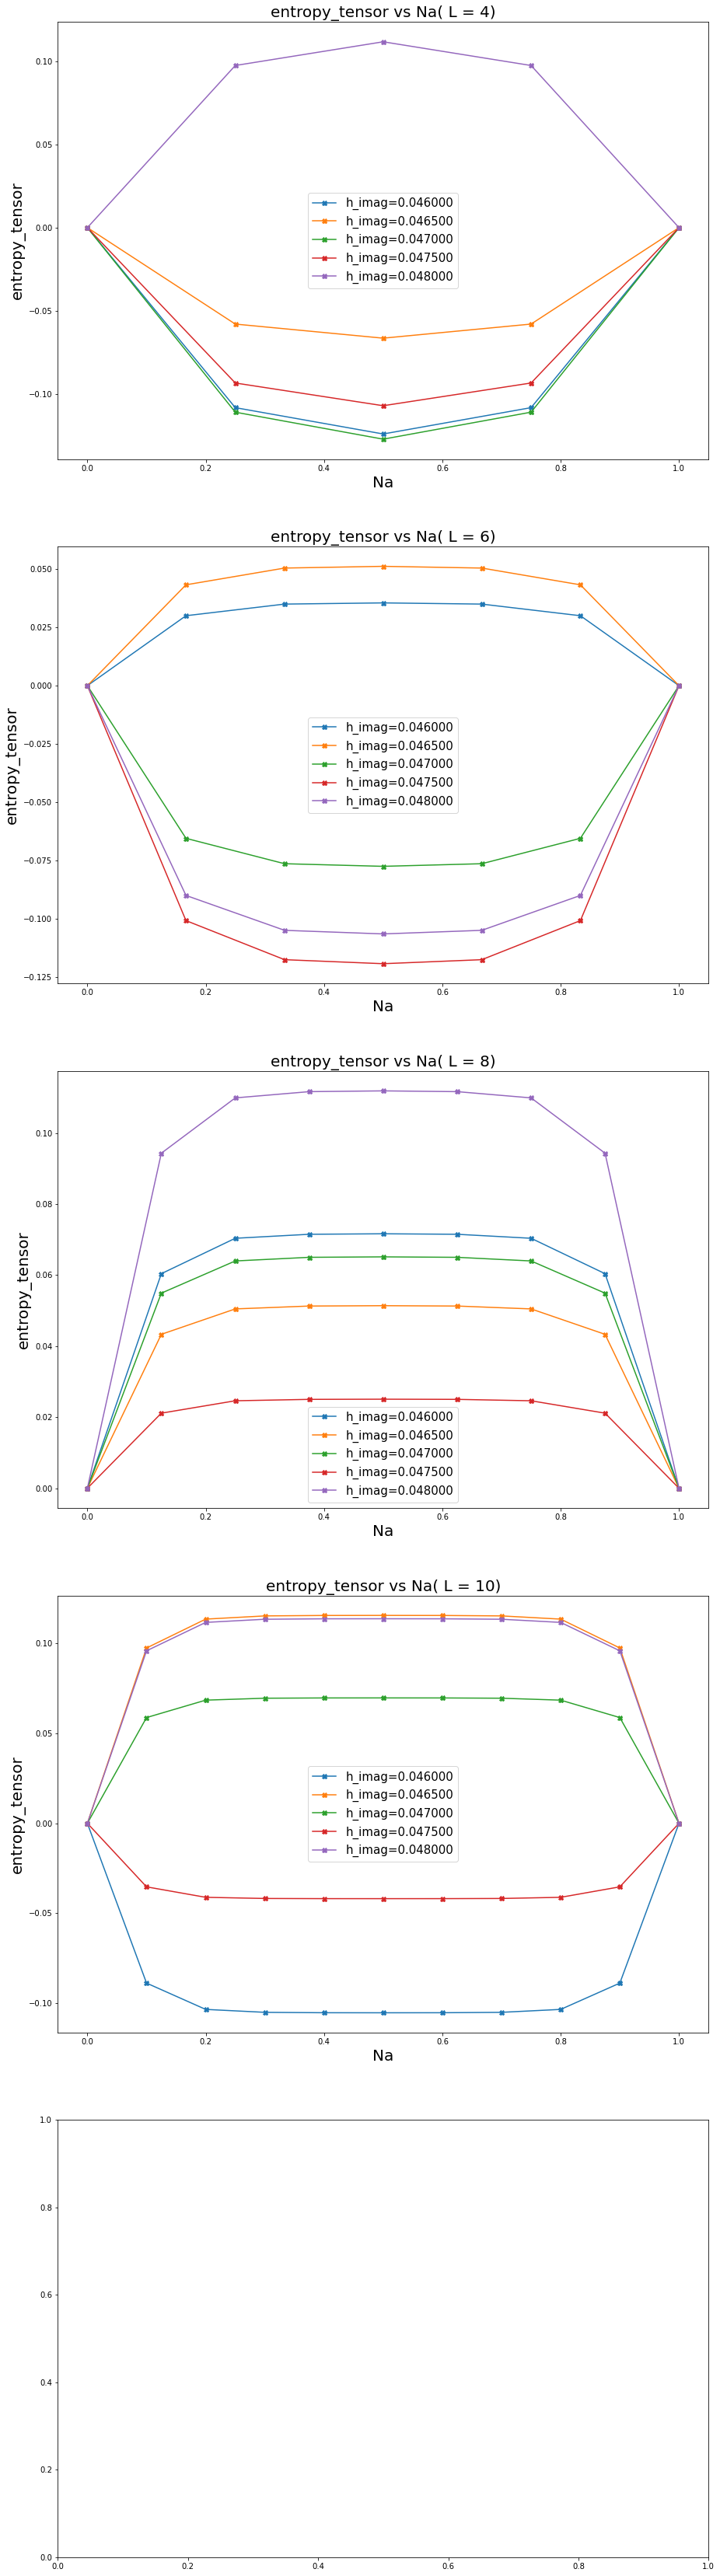

In [35]:
fig, ax = plt.subplots(len(hx),figsize=(15,15*len(Llist)))
entropyForAsize = np.zeros((len(Llist),len(hx)))
entropyForAsize_tensor = np.zeros((len(Llist),len(hx)))
for l in range(len(Llist)):
    L = Llist[l]
    # for h in range(len(hx)):
    #     entropyForAsize[l,h] = entropy[l][Llist[l]//2,h]
    for h in range(len(hx)):
        entropyForAsize_tensor[l,h] = entropy_tensor[l][Llist[l]//2,h]

# plt.figure(figsize=(12,12))
# for l in range(len(Llist)):
# l = 2
for l in range(len(Llist)):
    for h in range(len(hx)):
        Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
        SNa = []
        for i in range(len(Na)):
            SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
        ax[l].plot(SNa[:],entropy_tensor[l][:,h], "-X", label = "h_imag=%f" %(hx[h]))
        ax[l].set_ylabel("entropy_tensor", fontsize = 20)
        ax[l].set_xlabel("Na", fontsize = 20)
        ax[l].set_title("entropy_tensor vs Na( L = %d)" %(Llist[l]), fontsize = 20)
        ax[l].legend(loc = "best", fontsize=15)
        # plt.xscale('log')
        # plt.yscale('log')

### 暫時不用

In [76]:
np.linspace(0,Llist[3],Llist[3]+1,dtype = int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [128]:
entropy_tensor[3][:,9]

array([0.        , 0.05739891, 0.05739074, 0.05739074, 0.05739074,
       0.05739074, 0.05739074, 0.05739074, 0.05739074, 0.05739891,
       0.        ])

In [72]:
print(entropy_tensor[l][:,49])

[ 0.         -0.06044128 -0.06043342 -0.06043342 -0.06043342 -0.06043342
 -0.06043342 -0.06044128 -0.0605802 ]


In [ ]:
Llist = np.linspace(4,10,(10-4)//2 + 1,dtype = int)
print(Llist)
hx = np.linspace(0,1,11)
E0 = np.zeros((len(Llist),len(hx)))
E1 = np.zeros((len(Llist),len(hx)))
# entropy = np.zeros((len(Llist),len(Llist)+1,len(hz)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hx)))
lamda = np.zeros((len(Llist),len(hx)))
SzE = np.zeros((len(Llist),len(hx)))
SxE = np.zeros((len(Llist),len(hx)))


# fig, ax = plt.subplots(figsize=(16,16))
for l in range(len(Llist)):
    Size = Llist[l]
    print("Size:",Size)
    # entropy.append(np.zeros((Size+1,len(hz))))
    entropy_tensor.append(np.zeros((Size+1,len(hx))))
    for hx_i in range(len(hx)):

        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(Size,sparseSx,sparseSy,sparseSz,sparseI,0.8,hx[hx_i],0.2)
        # ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
        # ex, Svx = sparse.linalg.eigsh(SHtot + 0.01*Sxtot,which="SA")

        eeR, Sv_R = sparse.linalg.eigs(SHtot,which="SR")
        SHtot_dagger = SHtot.conjugate().transpose()
        eeL, Sv_L = sparse.linalg.eigs(SHtot_dagger,which="SR")
        phase = Sv_R[:,0].conjugate() @ Sv_L[:,0]
        print("phase:", phase)
        L0 = np.copy(Sv_L[:,0]/phase)
        R = np.copy(Sv_R[:,0])
        L = np.copy(Sv_L[:,0])

        rho_RL = np.tensordot(R,L.conjugate(),0)
        rho_RL0 = np.tensordot(R,L0.conjugate(),0)
        rho_RR = np.tensordot(R,R.conjugate(),0)

        # print("Sv_R[:,0].conjugate() @ Sv_R[:,0]",Sv_R[:,0].conjugate() @ Sv_R[:,0])
        # print("np.trace(rho_RL)",np.trace(rho_RL))
        # print("np.trace(rho_RL0)",np.trace(rho_RL0))
        # print("np.trace(rho_RR)",np.trace(rho_RR))

        Na = np.linspace(0,Size,Size+1,dtype = int)
        print(Na)
        for na in range(len(Na)):
            # rv = np.reshape(Sv[:,0], (2**Na[na],2**(L-Na[na])))
            # s = np.linalg.svd(rv, full_matrices=False, compute_uv=False)

            # 用來把基態 reshape 成 (2,2,2,2...)
            tensorshape = []
            for L_i in range(Size):
                tensorshape.append(2)
            # 紀錄要接的index
            dotAxes = np.linspace(0,Size-1,Size,dtype=int)
            dotAxes=dotAxes[na:Size]
            # print(dotAxes)
            if((na == 0) | (na == Size)):
                print("na:",na)
                entropy_tensor[l][na,hx_i] = 0
            else:
                # 接完之後要 reshape 回一隻腳
                Ashape = (2**(na),2**((na)))
                eigntensorR = np.reshape(R,tensorshape)
                eigntensorL0 = np.reshape(L0,tensorshape)
                Atensor = np.reshape(np.tensordot(eigntensorR,eigntensorL0,axes=(dotAxes,dotAxes)),Ashape)
                singVlue, singVec = la.eig(Atensor)
                for svalue in singVlue:
                    entropy_tensor[l][na,hx_i] = entropy_tensor[l][na,hx_i] - np.real(svalue)*np.log(np.abs(svalue))

In [7]:
Llist = np.linspace(4,10,(10-4)//2 + 1,dtype = int)
print(Llist)
hx = np.linspace(0,0.5,11)
E0 = np.zeros((len(Llist),len(hx)))
E1 = np.zeros((len(Llist),len(hx)))
# entropy = np.zeros((len(Llist),len(Llist)+1,len(hz)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hx)))
lamda = np.zeros((len(Llist),len(hx)))
SzE = np.zeros((len(Llist),len(hx)))
SxE = np.zeros((len(Llist),len(hx)))


# fig, ax = plt.subplots(figsize=(16,16))
for l in range(len(Llist)):
    Size = Llist[l]
    # print("Size:",Size)
    # entropy.append(np.zeros((Size+1,len(hz))))
    entropy_tensor.append(np.zeros((Size+1,len(hx))))
    for hx_i in range(len(hx)):

        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(Size,sparseSx,sparseSy,sparseSz,sparseI,0.8,hx[hx_i],0.0465)
        # ee, Sv = sparse.linalg.eigsh(SHtot,which="SA")
        # ex, Svx = sparse.linalg.eigsh(SHtot + 0.01*Sxtot,which="SA")

        eeR, Sv_R = sparse.linalg.eigs(SHtot,which="SR")
        SHtot_dagger = SHtot.conjugate().transpose()
        eeL, Sv_L = sparse.linalg.eigs(SHtot_dagger,which="SR")

        for i in range(len(Sv_L[0,:])):
            phase = np.copy(Sv_R[:,0].conjugate() @ Sv_L[:,i])
            if(phase.real > 0.00005):
                print("phaseReal:", phase.real)
                break

        # if(l==3):    
        #     print("i:",i)
        #     print("hx:", hx[hx_i])
        #     print("phase:", phase)
        phase = np.copy(Sv_R[:,0].conjugate() @ Sv_L[:,i])
        print("phase:", phase)    
        L0 = np.copy(Sv_L[:,i]/phase)
        R = np.copy(Sv_R[:,0])
        L = np.copy(Sv_L[:,i])

        rho_RL = np.tensordot(R,L.conjugate(),0)
        rho_RL0 = np.tensordot(R,L0.conjugate(),0)
        rho_RR = np.tensordot(R,R.conjugate(),0)

        # print("Sv_R[:,0].conjugate() @ Sv_R[:,0]",Sv_R[:,0].conjugate() @ Sv_R[:,0])
        # print("np.trace(rho_RL)",np.trace(rho_RL))
        # print("np.trace(rho_RL0)",np.trace(rho_RL0))
        # print("np.trace(rho_RR)",np.trace(rho_RR))

        Na = np.linspace(0,Size,Size+1,dtype = int)
        # print(Na)
        for na in range(len(Na)):
            # rv = np.reshape(Sv[:,0], (2**Na[na],2**(L-Na[na])))
            # s = np.linalg.svd(rv, full_matrices=False, compute_uv=False)

            # 用來把基態 reshape 成 (2,2,2,2...)
            tensorshape = []
            for L_i in range(Size):
                tensorshape.append(2)
            # 紀錄要接的index
            dotAxes = np.linspace(0,Size-1,Size,dtype=int)
            dotAxes=dotAxes[na:Size]
            # print(dotAxes)
            if((na == 0) | (na == Size)):
                # print("na:",na)
                entropy_tensor[l][na,hx_i] = 0
            else:
                # 接完之後要 reshape 回一隻腳
                Ashape = (2**(na),2**((na)))
                eigntensorR = np.reshape(R,tensorshape)
                eigntensorL0 = np.reshape(L0,tensorshape)
                Atensor = np.reshape(np.tensordot(eigntensorR,eigntensorL0,axes=(dotAxes,dotAxes)),Ashape)
                singVlue, singVec = la.eig(Atensor)
                for svalue in singVlue:
                    entropy_tensor[l][na,hx_i] = entropy_tensor[l][na,hx_i] - np.real(svalue)*np.log(np.abs(svalue))

            # for svalue in s:
            #     entropy[l][na,hz_i] = entropy[l][na,hz_i] - (svalue)*(svalue)*np.log(svalue*svalue)

[ 4  6  8 10]
phase: (-1.1102230246251565e-16+0j)
phaseReal: 0.5357116293314746
phase: (0.5357116293314746+0.8443688403693589j)
phase: (2.0816681711721685e-16-1.214306433183765e-17j)
phaseReal: 0.38368467693372665
phase: (0.38368467693372665-0.9232175525969999j)
phase: (-6.938893903907228e-18+9.020562075079397e-17j)
phase: (9.8879238130678e-17+9.367506770274758e-17j)
phaseReal: 0.7997946855528095
phase: (0.7997946855528095+0.5990426329156723j)
phaseReal: 0.954746034017304
phase: (0.954746034017304-0.29432174654310145j)
phaseReal: 0.9986334562987063
phase: (0.9986334562987063-0.02368122478985607j)
phase: (9.80118763926896e-17-1.0234868508263162e-16j)
phase: (2.636779683484747e-16+3.3306690738754696e-16j)
phase: (3.080730721498879e-17+0j)
phase: (-4.786752591523502e-17-1.211934740931453e-16j)
phaseReal: 0.08175606575829064
phase: (0.08175606575829064-0.9964932854863584j)
phaseReal: 0.9857776165724845
phase: (0.9857776165724845-0.16601035279641135j)
phaseReal: 0.9696498704195007
phase: (0

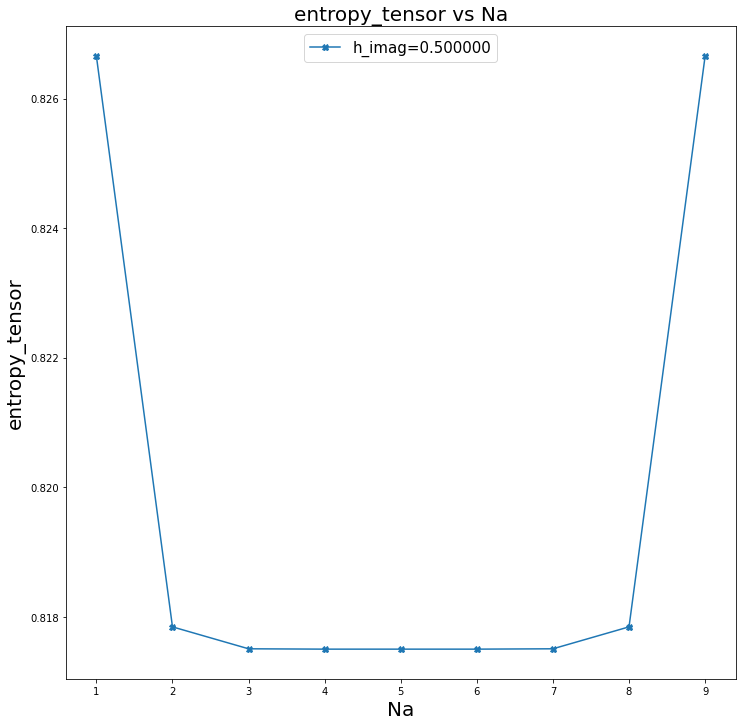

In [45]:
# fig, ax = plt.subplots(2,figsize=(20,20))
entropyForAsize = np.zeros((len(Llist),len(hx)))
entropyForAsize_tensor = np.zeros((len(Llist),len(hx)))
for l in range(len(Llist)):
    L = Llist[l]
    # for h in range(len(hx)):
    #     entropyForAsize[l,h] = entropy[l][Llist[l]//2,h]
    for h in range(len(hx)):
        entropyForAsize_tensor[l,h] = entropy_tensor[l][Llist[l]//2,h]

# for hx_i in range(len(hx[0:(len(hx)+1)//2])):
#     if(hz_i >= (len(hx)-1)//2 - 2):
#         ax[0][0].plot(Llist[:],entropyForAsize[:,hx_i], "-X", label = "%f" %(hx[hx_i]))
#         ax[0][0].set_ylabel("Entropy", fontsize = 20)
#         ax[0][0].set_xlabel("log(L)", fontsize = 20)
#         ax[0][0].set_title("Entropy vs log(L)", fontsize = 20)
#         ax[0][0].legend(loc = "upper left", fontsize=15)
#         ax[0][0].set_xscale('log')

# for hx_i in range(len(hx[0:(len(hx)+1)//2])):
#     if(hx_i >= (len(hx)-1)//2 - 2):
#         ax[0][1].plot(Llist[:],entropyForAsize_tensor[:,hx_i], "-X", label = "%f" %(hx[hx_i]))
#         ax[0][1].set_ylabel("entropy_tensor", fontsize = 20)
#         ax[0][1].set_xlabel("log(L)", fontsize = 20)
#         ax[0][1].set_title("entropy_tensor vs log(L)", fontsize = 20)
#         ax[0][1].legend(loc = "upper left", fontsize=15)
#         ax[0][1].set_xscale('log')

# for l in range(len(Llist)):
#     Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
#     SNa = []
#     for i in range(len(Na)):
#         SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
#     ax[0].plot(SNa[:],entropy[l][:,hz_i], "-X", label = "%d" %(Llist[l]))
#     ax[0].set_ylabel("Entropy", fontsize = 20)
#     ax[0].set_xlabel("Na", fontsize = 20)
#     ax[0].set_title("entropy vs Na", fontsize = 20)
#     ax[0].legend(loc = "upper left", fontsize=15)

plt.figure(figsize=(12,12))
# for l in range(len(Llist)):
l =3
for h in [6,7,8,9]:
    Na = np.linspace(max(Llist)//2 - Llist[l]//2,max(Llist)//2 + Llist[l]//2,Llist[l]+1)
    SNa = []
    for i in range(len(Na)):
        SNa.append((Na[i]-Na[0])/(Na[-1]-Na[0]))
    plt.plot(Na[1:len(Na)-1],entropy_tensor[l][1:len(Na)-1,h], "-X", label = "h_imag=%f" %(hx[h]))
    plt.ylabel("entropy_tensor", fontsize = 20)
    plt.xlabel("Na", fontsize = 20)
    plt.title("entropy_tensor vs Na", fontsize = 20)
    plt.legend(loc = "best", fontsize=15)
    # plt.xscale('log')
    # plt.yscale('log')

In [110]:
hx

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [171]:
Llist = np.linspace(4,12,(12-4)//2 + 1,dtype = int)
print(Llist)
hx = np.linspace(0,1,51)
E0 = np.zeros((len(Llist),len(hx)))
E1 = np.zeros((len(Llist),len(hx)))
# entropy = np.zeros((len(Llist),len(Llist)+1,len(hz)))
entropy = []
entropy_tensor = []

np.zeros((len(Llist),len(Llist) + 1))
gap = np.zeros((len(Llist),len(hx)))
lamda = np.zeros((len(Llist),len(hx)))
SzE = np.zeros((len(Llist),len(hx)))
SxE = np.zeros((len(Llist),len(hx)))


# fig, ax = plt.subplots(figsize=(16,16))
for l in range(len(Llist)):
    size = Llist[l]
    print("size:",size)
    entropy.append(np.zeros((size+1,len(hx))))
    entropy_tensor.append(np.zeros((size+1,len(hx))))
    for hx_i in range(len(hx)):

        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(size,sparseSx,sparseSy,sparseSz,sparseI,0.8,hx[hx_i],0.2)
        
        ee, Sv_R = sparse.linalg.eigs(SHtot,which="SR")
        SHtot_dagger = SHtot.conjugate().transpose()
        ee, Sv_L = sparse.linalg.eigs(SHtot_dagger,which="SR")
        phase = Sv_R[:,0].conjugate() @ Sv_L[:,0]

        # L0 = np.copy(Sv_L[:,0]/phase)
        # R = np.copy(Sv_R[:,0])
        # L = np.copy(Sv_L[:,0])

        # # rho_RL = np.tensordot(R,L.conjugate(),0)
        # rho_RL0 = np.tensordot(R,L0.conjugate(),0)
        # rho_RR = np.tensordot(R,R.conjugate(),0)

        Na = np.linspace(0,size,size+1,dtype = int)

        for na in range(len(Na)):
            # rv = np.reshape(Sv[:,0], (2**Na[na],2**(size-Na[na])))
            # s = np.linalg.svd(rv, full_matrices=False, compute_uv=False)

            L0 = np.copy(Sv_L[:,0]/phase)
            R = np.copy(Sv_R[:,0])
            L = np.copy(Sv_L[:,0])

            # rho_RL = np.tensordot(R,L.conjugate(),0)
            rho_RL0 = np.tensordot(R,L0.conjugate(),0)
            rho_RR = np.tensordot(R,R.conjugate(),0)

            # 用來把基態 reshape 成 (2,2,2,2...)
            tensorshape = []
            for L_i in range(2*size):
                tensorshape.append(2)
            # 紀錄要接的index
            dotAxes = np.linspace(0,2*size-1,2*size,dtype=int)
            dotAxes1=dotAxes[size-na:size]
            dotAxes2=dotAxes[size+size-na:size+size]
            # print(dotAxes)
            if((na == 0) | (na == size+1)):
                entropy_tensor[l][na,hx_i] = 0
            else:
                # 接完之後要 reshape 回一隻腳
                Ashape = (2**(2*size-2*na),2**((2*size-2*na)))
                eigntensor = np.reshape(rho_RL0,tensorshape)
                eigntensor1 = np.copy(eigntensor)
                Atensor = np.reshape(np.trace(eigntensor1,axes=(dotAxes1,dotAxes2)),Ashape)
                singVlue, singVec = la.eig(Atensor)
                for svalue in singVlue:
                    entropy_tensor[l][na,hx_i] = entropy_tensor[l][na,hx_i] - np.abs(svalue)*np.log(np.abs(svalue))

            # for svalue in s:
            #     entropy[l][na,hx_i] = entropy[l][na,hx_i] - (svalue)*(svalue)*np.log(svalue*svalue)

[ 4  6  8 10 12]
size: 4


TypeError: _trace_dispatcher() got an unexpected keyword argument 'axes'

In [88]:
L = 6
Na = np.linspace(0,L,L+1,dtype = int)

In [127]:
a=np.tensordot(eigntensor,eigntensor1,axes=(dotAxes1,dotAxes2))

In [137]:
a=np.linspace(0,10,11)
a[0:2]

array([0., 1.])

In [166]:
np.shape(eigntensor1)

(2, 2, 2, 2, 2, 2, 2, 2)

In [170]:
np.trace(eigntensor1,dotAxes1,dotAxes2)

TypeError: only integer scalar arrays can be converted to a scalar index

In [107]:
dotAxes = np.linspace(0,2*size-1,2*size,dtype=int)
dotAxes1=dotAxes[na+1:size]
dotAxes2=dotAxes[size+na+1:size+size]

In [172]:
dotAxes1

array([3])

In [174]:
dotAxes2

array([7])

In [ ]:
Llist = np.linspace(4,16,(18-4)//2+1,dtype = int)
print(Llist)
hx = np.linspace(0.1,0.25,31)
E0 = np.zeros((len(Llist),len(hx)),dtype=complex)
E1 = np.zeros((len(Llist),len(hx)),dtype=complex)
imGap = np.zeros((len(Llist),len(hx)))
lamda = np.zeros((len(Llist),len(hx)))
Gap = np.zeros((len(Llist),len(hx)))



for l in range(len(Llist)):
    L = Llist[l]
    for hx_i in range(len(hx)):
        SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(L,sparseSx,sparseSy,sparseSz,sparseI,1,hx[hx_i],0.2)
        
        ee, Sv_R = sparse.linalg.eigs(SHtot,which="SR")
        SHtot_dagger = SHtot.conjugate().transpose()
        ee, Sv_L = sparse.linalg.eigs(SHtot_dagger,which="SR")
        phase = Sv_R[:,0].conjugate() @ Sv_L[:,0]

        L0 = np.copy(Sv_L[:,0]/phase)
        R = np.copy(Sv_R[:,0])
        L = np.copy(Sv_L[:,0])

        # rho_RL = np.tensordot(R,L.conjugate(),0)
        rho_RL0 = np.tensordot(R,L0.conjugate(),0)
        rho_RR = np.tensordot(R,R.conjugate(),0)

In [53]:
L.conjugate() @ L

(0.9999999999999997+0j)

In [6]:
y=np.array([[1,3],[4,5]])
print(y.transpose())

[[1 4]
 [3 5]]


## Degenergy

### check degenercy

In [5]:
Htot, ztot, zlist, xtot, xlist = Hamiltonain(4, Sx, Sy, Sz, I, 1, 0, 0.5)

In [22]:
SHtot, Sztot, Szlist, Sxtot, Sxlist = sparseHamiltonain(4, sparseSx, sparseSy, sparseSz, sparseI, 1, 0, 0.5)

In [18]:
x = np.arange(4).reshape((2,2))
x

array([[0, 1],
       [2, 3]])

In [19]:
shift_one_site = np.eye(2**4)
shift_one_site = shift_one_site.reshape((2,2,2,2,2,2,2,2))
# print(np.shape(shift_one_site))
shift_one_site = np.transpose(shift_one_site,(0,1,2,3,7,4,5,6))
shift_one_site = shift_one_site.reshape((2**4,2**4))
print(la.eigvals(shift_one_site))
# print(shift_one_site)


[-1.00000000e+00+0.j  6.44695442e-17+1.j  6.44695442e-17-1.j
  1.00000000e+00+0.j -1.00000000e+00+0.j  6.44695442e-17+1.j
  6.44695442e-17-1.j  1.00000000e+00+0.j  1.00000000e+00+0.j
 -1.00000000e+00+0.j -1.00000000e+00+0.j  6.44695442e-17+1.j
  6.44695442e-17-1.j  1.00000000e+00+0.j  1.00000000e+00+0.j
  1.00000000e+00+0.j]


[[0]]


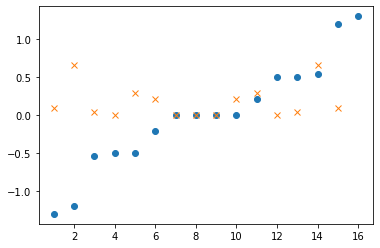

In [20]:
ee = la.eigvals(Htot)
sort_ee = np.sort(ee)
gap = np.zeros(len(ee)-1)
sort_gap = np.zeros(len(ee)-1)
block = []

for i in range(len(ee) - 1):
    gap[i] = sort_ee[i + 1] - sort_ee[i]

sort_gap = np.sort(gap)

numOfBlock = 0
block.append([])
block[0].append(0)

for i in range(len(ee)-1):
    if(gap[i] > gap[4]):
        numOfBlock = numOfBlock + 1
    # else:
    #     block.append([])
    #     numOfBlock = numOfBlock + 1

# np_ee = np.zeros(2**4)
# for i in range(len(ee)):
#     np_ee[i] = ee[i]
# ee = np.sort(ee)
plt.plot(np.linspace(1,len(sort_ee),len(sort_ee)),sort_ee,"o")
plt.plot(np.linspace(1,len(gap),len(gap)),gap,"x")
print(block)

In [21]:
numOfBlock

3